# 1- Introduction

## 1.1- Problem Statement:
## For the given data of employees
## Prepare a model for the HR department to predict the Attrition and give the insights from the data about the important factors associated with the attrition so that HR can take the corrective or preventive measures to stop or control the attrition.

# 2- Importing Necessary Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# 3- The Raw Data

In [2]:
df=pd.read_csv('c:/users/lenovo/desktop/py/HR_Employee_Attrition_Data.csv')
pd.set_option('display.max_columns',500)
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
2935   36        No  Travel_Frequently        884  Research & Development   
2936   39        No      Travel_Rarely        613  Research & Development   
2937   27        No      Travel_Rarely        155  Research & Development   
2938   49        No  Travel_Frequently       1023                   Sales   
2939   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
2935                23          2        Medical              1   
2936                 6          1        Medical              1   
2937                 4          3  Life Sciences              1   
2938                 2          3        Medical              1   
2939                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0                  1                        2  Female          94   
1                  2                        3    Male          61   
2                  3                        4    Male          92   
3                  4                        4  Female          56   
4                  5                        1    Male          40   
...              ...                      ...     ...         ...   
2935            2936                        3    Male          41   
2936            2937                        4    Male          42   
2937            2938                        2    Male          87   
2938            2939                        4    Male          63   
2939            2940                        2    Male          82   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
0                  3         2            Sales Executive                4   
1                  2         2         Research Scientist                2   
2                  2         1      Laboratory Technician                3   
3                  3         1         Research Scientist                3   
4                  3         1      Laboratory Technician                2   
...              ...       ...                        ...              ...   
2935               4         2      Laboratory Technician                4   
2936               2         3  Healthcare Representative                1   
2937               4         2     Manufacturing Director                2   
2938               2         2            Sales Executive                2   
2939               4         2      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
0           Single           5993        19479                   8      Y   
1          Married           5130        24907                   1      Y   
2           Single           2090         2396                   6      Y   
3          Married           2909        23159                   1      Y   
4          Married           3468        16632                   9      Y   
...            ...            ...          ...  

In [3]:
# checking the shape and dimension of the data
print(f'shape:\n{df.shape}')
print()
print(f'dimensions:{df.ndim}')

shape:
(2940, 35)

dimensions:2


# 4- Data Preparation and Exploratary Data Analysis

## 4.1- Dealing with Null values

In [4]:
# creating a copy of the data
df1=df.copy()

In [5]:
# null values
print(df1.isnull().any())

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

### *we can see that we do not have any null values in our data.

## 4.2- Lets check the datatype of the features

In [6]:
# feature datatypes
print(df1.dtypes)

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

### *we see several categorical(object) features and several numerical features, lets study the unique values and their count for categorical columns and numerical columns separately, to derive some insights.

## 4.3- basic study of Feature values for removal of nuisance columns.

In [7]:
# Categorical Features unique value Count
for n in df1.columns:
    if df1[str(n)].dtype=='object':
        print(f'{n}\n\n{df1[str(n)].value_counts()}\n----------------------------\n')

Attrition

No     2466
Yes     474
Name: Attrition, dtype: int64
----------------------------

BusinessTravel

Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64
----------------------------

Department

Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64
----------------------------

EducationField

Life Sciences       1212
Medical              928
Marketing            318
Technical Degree     264
Other                164
Human Resources       54
Name: EducationField, dtype: int64
----------------------------

Gender

Male      1764
Female    1176
Name: Gender, dtype: int64
----------------------------

JobRole

Sales Executive              652
Research Scientist           584
Laboratory Technician        518
Manufacturing Director       290
Healthcare Representative    262
Manager                      204
Sales Representative         166
Research Direc

### *From above study of categorical features we can see that 'Over18' is a Zero-Variance feature, hence it is of no use in analysis or model building so we need to drop it, lets check for other such useless columns in numerical features.

In [8]:
# Numerical features unique value Count
for n in df1.columns:
    if df1[str(n)].dtype!='object':
        print(f'{n}\n\n{df1[str(n)].value_counts()}\n----------------------------\n')

Age

35    156
34    154
36    138
31    138
29    136
32    122
30    120
33    116
38    116
40    114
37    100
27     96
28     96
42     92
39     84
45     82
41     80
26     78
44     66
46     66
43     64
50     60
25     52
24     52
49     48
47     48
55     44
51     38
53     38
48     38
54     36
52     36
22     32
56     28
23     28
58     28
21     26
20     22
59     20
19     18
18     16
60     10
57      8
Name: Age, dtype: int64
----------------------------

DailyRate

691     12
408     10
530     10
1329    10
1082    10
        ..
650      2
279      2
316      2
314      2
628      2
Name: DailyRate, Length: 886, dtype: int64
----------------------------

DistanceFromHome

2     422
1     416
10    172
9     170
3     168
7     168
8     160
5     130
4     128
6     118
16     64
11     58
24     56
23     54
29     54
15     52
18     52
26     50
25     50
20     50
28     46
19     44
14     42
12     40
17     40
22     38
13     38
21     36
27     2

### *From the above study of numerical features here we see that 'EmployeeCount' and 'StandardHours' are again Zero-Variance features hence of no use so we need to drop them, similarly 'EmployeeNumber' is of no use hence dropping that as well and Setting that as an index to our DataFrame.

In [9]:
# setting the index of the data as 'EmployeeNumber'.
# dropping features 'Over18', 'EmployeeCount', 'StandardHours' and 'EmployeeNumber' from the data.
df1.index=df['EmployeeNumber']
df1.drop(['EmployeeNumber','Over18','EmployeeCount','StandardHours'],axis='columns',inplace=True)
df1

Age Attrition     BusinessTravel  DailyRate  \
EmployeeNumber                                                
1                41       Yes      Travel_Rarely       1102   
2                49        No  Travel_Frequently        279   
3                37       Yes      Travel_Rarely       1373   
4                33        No  Travel_Frequently       1392   
5                27        No      Travel_Rarely        591   
...             ...       ...                ...        ...   
2936             36        No  Travel_Frequently        884   
2937             39        No      Travel_Rarely        613   
2938             27        No      Travel_Rarely        155   
2939             49        No  Travel_Frequently       1023   
2940             34        No      Travel_Rarely        628   

                            Department  DistanceFromHome  Education  \
EmployeeNumber                                                        
1                                Sales                 1          2   
2               Research & Development                 8          1   
3               Research & Development                 2          2   
4               Research & Development                 3          4   
5               Research & Development                 2          1   
...                                ...               ...        ...   
2936            Research & Development                23          2   
2937            Research & Development                 6          1   
2938            Research & Development                 4          3   
2939                             Sales                 2          3   
2940            Research & Development                 8          3   

               EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
EmployeeNumber                                                               
1               Life Sciences                        2  Female          94   
2               Life Sciences                        3    Male          61   
3                       Other                        4    Male          92   
4               Life Sciences                        4  Female          56   
5                     Medical                        1    Male          40   
...                       ...                      ...     ...         ...   
2936                  Medical                        3    Male          41   
2937                  Medical                        4    Male          42   
2938            Life Sciences                        2    Male          87   
2939                  Medical                        4    Male          63   
2940                  Medical                        2    Male          82   

                JobInvolvement  JobLevel                    JobRole  \
EmployeeNumber                                                        
1                            3         2            Sales Executive   
2                            2         2         Research Scientist   
3                            2         1      Laboratory Technician   
4                            3         1         Research Scientist   
5                            3         1      Laboratory Technician   
...                        ...       ...                        ...   
2936                         4         2      Laboratory Technician   
2937                         2         3  Healthcare Representative   
2938                         4         2     Manufacturing Director   
2939                         2         2            Sales Executive   
2940                         4         2      Laboratory Technician   

                JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
EmployeeNumber                                                              
1                             4        Single           5993        19479   
2                             2       Married           5130        24907   
3                        

## 4.4- Lets study the distribution for target variable.

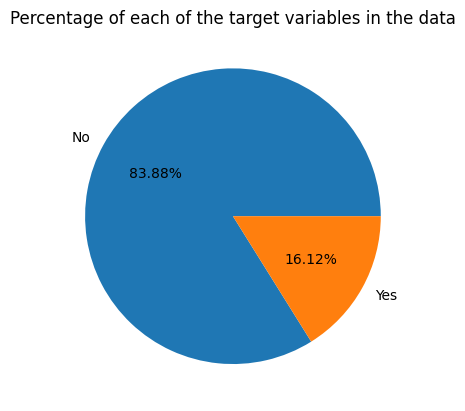

In [10]:
# pie-chart of the target variable: 'Attrition'
plt.pie(x=df1['Attrition'].value_counts(),labels=df1['Attrition'].value_counts().index,autopct='%0.2f%%')
plt.title('Percentage of each of the target variables in the data')
plt.show()

### *From above visualization of the target distribution we can clearly see the imbalance in our target variable, however this imbalance in the data makes sense as for any general company out there the attrition rate generally tends to be lower.
### *However there is still a fair bit of attrition we can see going on in the company and that is something we would want to explore further upon.

## 4.5- Lets analyse further by studying each of the variable to get further insights on what exactly is going on in the company.

Basic statistics of "Age" variable:

count    2940.000000
mean       36.923810
std         9.133819
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64



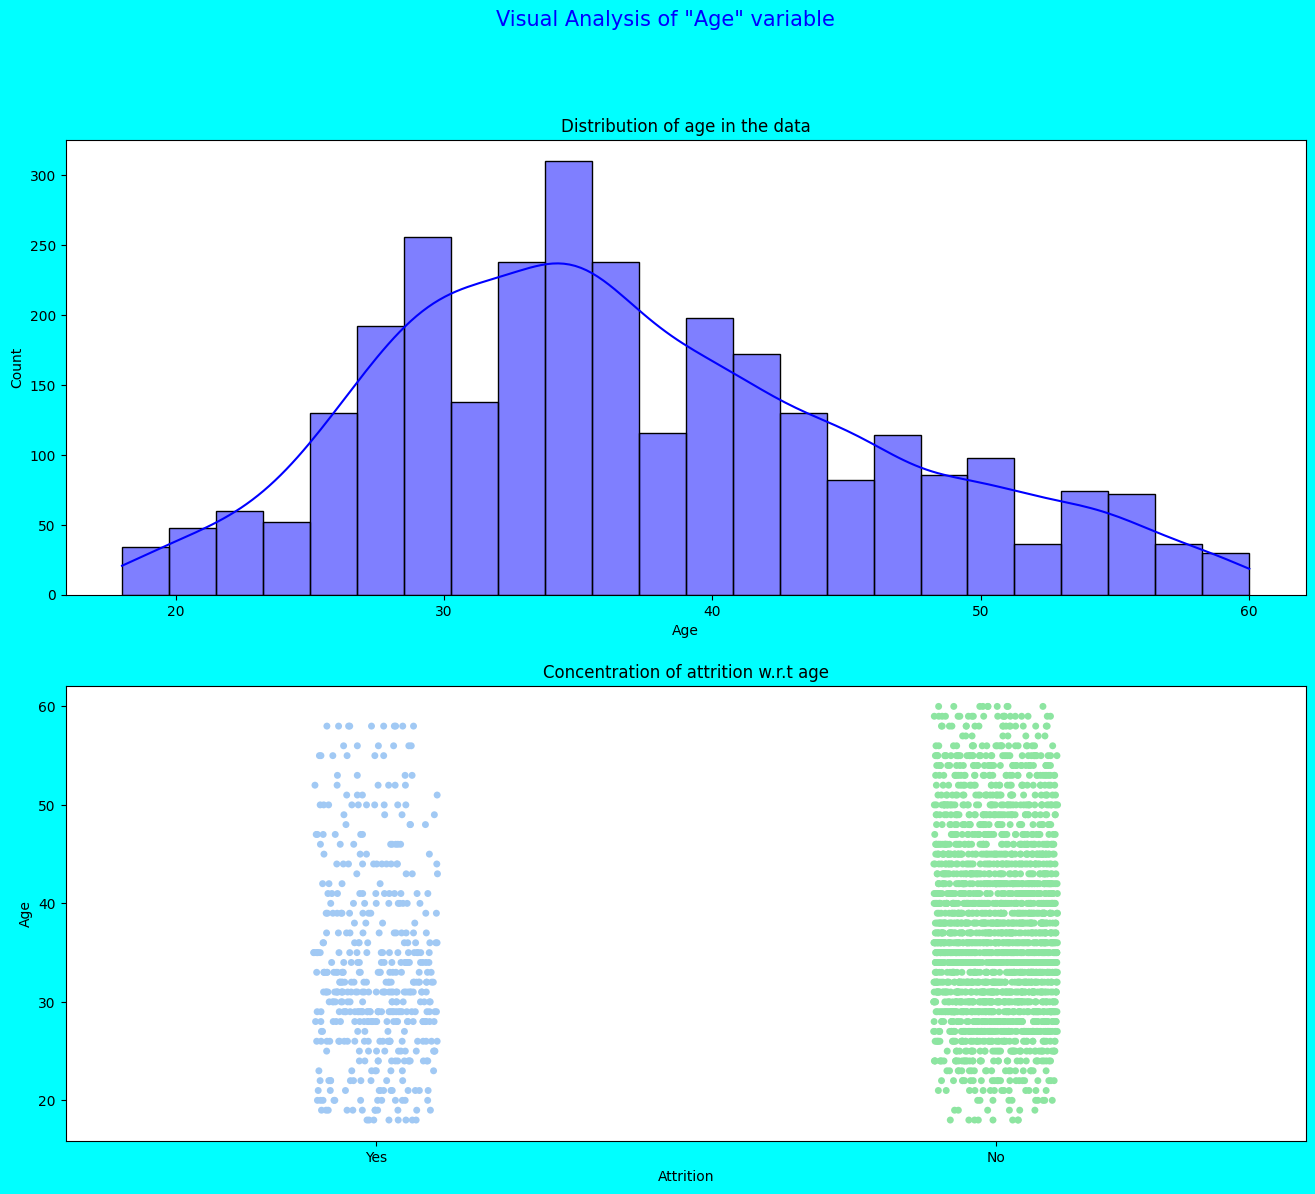

In [11]:
# analysis for the feature 'Age'

# basic statistics
print('Basic statistics of "Age" variable:\n')
print(df1['Age'].describe())
print()

# plotting histogram for age
plt.figure(figsize=(16,13),facecolor='cyan')
plt.suptitle('Visual Analysis of "Age" variable',fontsize=15,color='blue')
plt.subplot(2,1,1)
plt.title('Distribution of age in the data')
sns.histplot(x=df1['Age'],kde=True,color='blue')

# plotting stripplot to see the concentration of attrition w.r.t age
plt.subplot(2,1,2)
plt.title('Concentration of attrition w.r.t age')
sns.stripplot(x=df1['Attrition'],y=df1['Age'],palette=sns.color_palette('pastel6'))
plt.show()

### Insight 1:
### *From the above study we see that the concentration of attrition is quite high in the age group of 25 to 35, so management can take some actions regarding these employees so as to stop further attritions.
### *apart from that the data of age is pretty normally distributed in the company.

Basic statistics of "BusinessTravel" variable:

count              2940
unique                3
top       Travel_Rarely
freq               2086
Name: BusinessTravel, dtype: object


Frequency table w.r.t "BusinessTravel" and "Attritions":

Attrition            No  Yes
BusinessTravel              
Non-Travel          276   24
Travel_Frequently   416  138
Travel_Rarely      1774  312




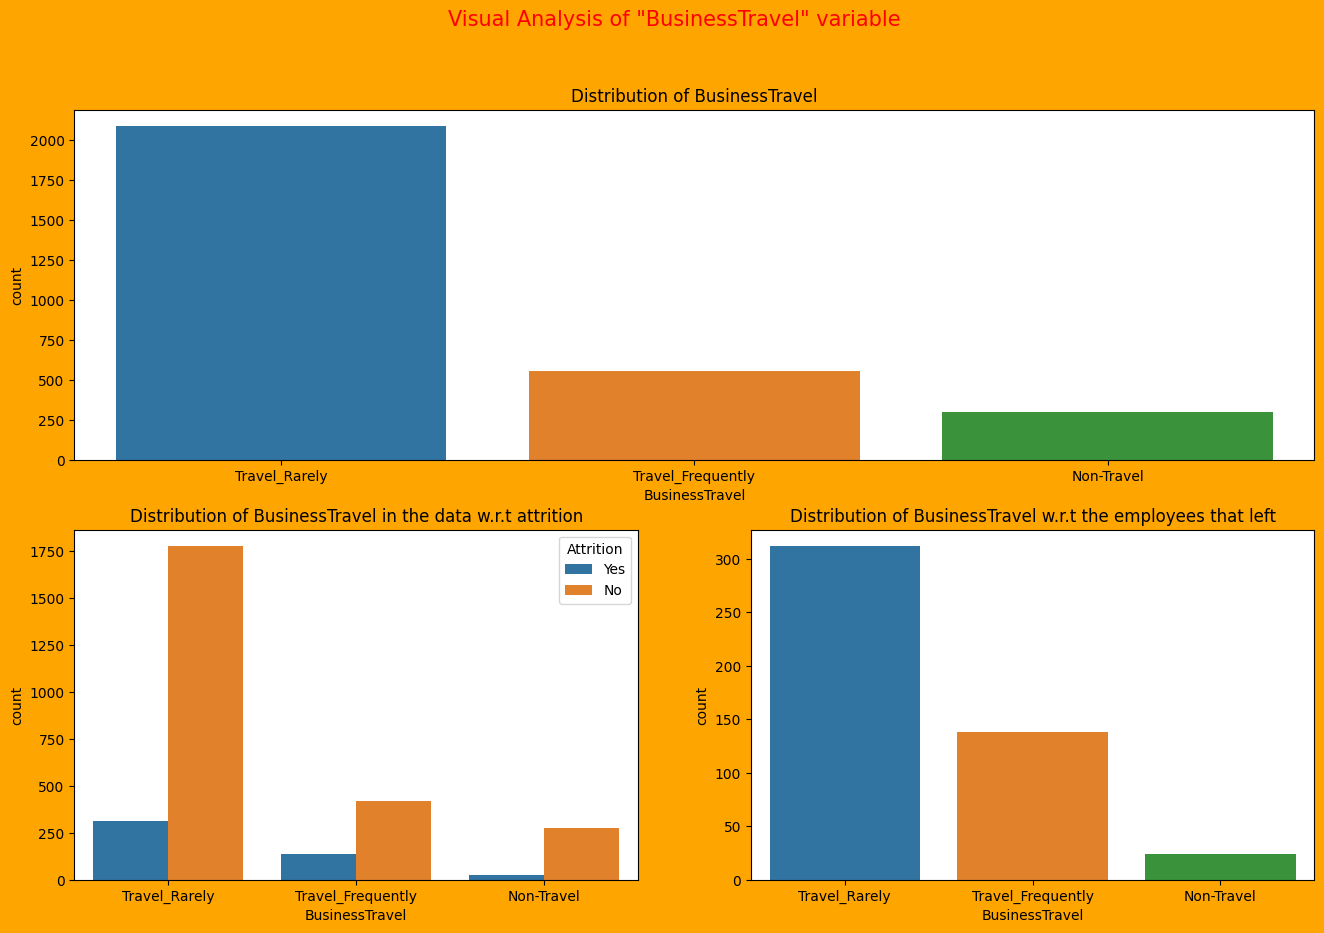

In [12]:
# analysis for the feature 'BusinessTravel'

# statistics for the 'BusinessTravel' feature
print('Basic statistics of "BusinessTravel" variable:\n')
print(df1['BusinessTravel'].describe())
print()
print()

# frequency table of 'BusinessTravel' w.r.t 'Attrition'
print('Frequency table w.r.t "BusinessTravel" and "Attritions":\n')
print(pd.crosstab(df1['BusinessTravel'],df1['Attrition']))
print()
print()

# creating subplots
plt.subplots(2,2,figsize=(16,10),facecolor='orange')

# naming the figure
plt.suptitle('Visual Analysis of "BusinessTravel" variable',fontsize=15,color='red')

# plotting distribution for business travel
plt.subplot(2,1,1)
plt.title('Distribution of BusinessTravel')
sns.countplot(x=df1['BusinessTravel'])

# plotting distribution for business travel w.r.t attrition
plt.subplot(2,2,3)
plt.title('Distribution of BusinessTravel in the data w.r.t attrition')
sns.countplot(x=df1['BusinessTravel'],hue=df1['Attrition'])

# plotting distribution for business travel for employees that left the company
plt.subplot(2,2,4)
plt.title('Distribution of BusinessTravel w.r.t the employees that left')
sns.countplot(x=df1['BusinessTravel'][df1['Attrition']=='Yes'])
plt.show()

### Insight 2:
### *The above analysis states that almost 71% of the employees travel rarely in business related travel and hence they are the ones with highest level of attritions.
### *However we also see that when we go from Non-Travel to Travel_Frequently the level of attritions goes up by almost 6 times and when we go from Travel_Frequently to Travel_Rarely the level of attrition goes up by just almost 2 times, hence there is something that is causing lot of attritions when employees are travelling frequently, this point is further supported in the next finding.
### *It is also worth noting that out of all the non-travellers only 8% of them left, out of all the employees that travel frequently almost 25% of them left, and out of all the employees that travel rarely almost 15% of them left, so out of all the employees that travel frequently 1/4th of them ended up leaving.

In [13]:
# grouping the data based upon departments
dep=df1.groupby(['Department'])

# sales group
sales=dep.get_group('Sales')
# HR group
hr=dep.get_group('Human Resources')
# research & development group
rd=dep.get_group('Research & Development')

In [14]:
# detailed statistics regarding sales department who left the company
print('Employees sales department that left the company'.center(120))
sales[sales['Attrition']=='Yes'].describe()

                                    Employees sales department that left the company                                    


Age    DailyRate  DistanceFromHome   Education  \
count  184.000000   184.000000        184.000000  184.000000   
mean    34.260870   744.369565         10.804348    2.836957   
std      9.664163   400.031576          8.594367    0.972599   
min     18.000000   115.000000          1.000000    1.000000   
25%     28.000000   413.000000          3.000000    2.000000   
50%     32.500000   698.000000          9.000000    3.000000   
75%     41.000000  1064.750000         16.500000    4.000000   
max     55.000000  1496.000000         29.000000    5.000000   

       EnvironmentSatisfaction  HourlyRate  JobInvolvement    JobLevel  \
count               184.000000  184.000000      184.000000  184.000000   
mean                  2.467391   64.097826        2.467391    1.989130   
std                   1.139946   20.020787        0.855086    0.952358   
min                   1.000000   31.000000        1.000000    1.000000   
25%                   1.000000   48.000000        2.000000    1.000000   
50%                   2.000000   64.000000        3.000000    2.000000   
75%                   3.250000   82.000000        3.000000    2.250000   
max                   4.000000  100.000000        4.000000    5.000000   

       JobSatisfaction  MonthlyIncome   MonthlyRate  NumCompaniesWorked  \
count       184.000000     184.000000    184.000000          184.000000   
mean          2.521739    5908.456522  15380.304348            2.956522   
std           1.111079    3788.899148   7129.520602            2.606897   
min           1.000000    1081.000000   2447.000000            0.000000   
25%           1.750000    2749.000000   9436.000000            1.000000   
50%           3.000000    5314.000000  15866.500000            2.000000   
75%           3.000000    8176.750000  21749.250000            5.000000   
max           4.000000   19845.000000  26959.000000            9.000000   

       PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
count         184.000000         184.000000                184.000000   
mean           14.956522           3.108696                  2.652174   
std             3.438493           0.312106                  1.080728   
min            11.000000           3.000000                  1.000000   
25%            12.000000           3.000000                  2.000000   
50%            14.000000           3.000000                  3.000000   
75%            17.250000           3.000000                  4.000000   
max            24.000000           4.000000                  4.000000   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count        184.000000         184.000000             184.000000   
mean           0.500000           8.760870               2.750000   
std            0.880884           7.000967               1.242464   
min            0.000000           0.000000               0.000000   
25%            0.000000           3.000000               2.000000   
50%            0.000000           7.500000               3.000000   
75%            1.000000          12.000000               3.000000   
max            3.000000          33.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count       184.000000      184.000000          184.000000   
mean          2.739130        5.510870            3.304348   
std           0.766363        5.899883            3.214513   
min           1.000000        0.000000            0.000000   
25%           2.000000        1.000000            0.000000   
50%           3.000000        3.500000            2.000000   
75%           3.000000        8.000000            7.000000   
max           4.000000       32.000000           14.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count               184.000000            184.000000  
mean                  2.195652              3.032609  
std                   3.150988              3.313991  
min                   0.000000     

In [15]:
# detailed statistics regarding HR department who left the company
print('Employees of HR department that left the company'.center(120))
hr[hr['Attrition']=='Yes'].describe()

                                    Employees of HR department that left the company                                    


Age    DailyRate  DistanceFromHome  Education  \
count  24.000000    24.000000         24.000000  24.000000   
mean   30.083333   749.916667         13.416667   3.000000   
std     6.439799   386.878805          7.829247   1.103355   
min    19.000000   240.000000          1.000000   1.000000   
25%    26.000000   409.250000          7.500000   2.000000   
50%    29.500000   703.500000         15.000000   3.000000   
75%    34.000000  1017.750000         20.500000   4.000000   
max    44.000000  1376.000000         23.000000   5.000000   

       EnvironmentSatisfaction  HourlyRate  JobInvolvement   JobLevel  \
count                24.000000   24.000000       24.000000  24.000000   
mean                  2.333333   62.916667        2.500000   1.333333   
std                   1.203859   14.052438        0.780189   0.761387   
min                   1.000000   43.000000        1.000000   1.000000   
25%                   1.000000   55.000000        2.000000   1.000000   
50%                   2.000000   58.000000        2.500000   1.000000   
75%                   3.250000   66.750000        3.000000   1.000000   
max                   4.000000   91.000000        4.000000   3.000000   

       JobSatisfaction  MonthlyIncome   MonthlyRate  NumCompaniesWorked  \
count        24.000000      24.000000     24.000000           24.000000   
mean          2.166667    3715.750000  12853.083333            3.000000   
std           1.167184    2996.629647   7888.209919            3.310064   
min           1.000000    1555.000000   2326.000000            0.000000   
25%           1.000000    2172.000000   5956.000000            0.750000   
50%           2.000000    2652.500000  11559.000000            1.000000   
75%           3.000000    2886.250000  20040.000000            4.500000   
max           4.000000   10482.000000  23648.000000            9.000000   

       PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
count          24.000000          24.000000                 24.000000   
mean           13.833333           3.083333                  3.083333   
std             3.225802           0.282330                  0.880547   
min            11.000000           3.000000                  1.000000   
25%            11.000000           3.000000                  3.000000   
50%            13.000000           3.000000                  3.000000   
75%            15.000000           3.000000                  4.000000   
max            22.000000           4.000000                  4.000000   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count         24.000000          24.000000              24.000000   
mean           0.833333           6.083333               2.083333   
std            1.090140           6.358265               1.212854   
min            0.000000           1.000000               0.000000   
25%            0.000000           1.750000               1.750000   
50%            0.500000           5.000000               2.000000   
75%            1.000000           7.250000               3.000000   
max            3.000000          24.000000               4.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count        24.000000       24.000000           24.000000   
mean          2.916667        4.166667            2.000000   
std           0.503610        5.205905            2.245769   
min           2.000000        1.000000            0.000000   
25%           3.000000        1.000000            0.000000   
50%           3.000000        2.500000            2.000000   
75%           3.000000        4.250000            2.000000   
max           4.000000       20.000000            7.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count                24.000000             24.000000  
mean                  0.833333              1.500000  
std                   1.007220              1.888178  
min                   0.000000              0.000000  
25%   

In [16]:
# detailed statistics regarding Research & Development department who left the company
print('Employees of Research & Development department who left the company'.center(125))
rd[rd['Attrition']=='Yes'].describe()

                             Employees of Research & Development department who left the company                             


Age    DailyRate  DistanceFromHome   Education  \
count  266.000000   266.000000        266.000000  266.000000   
mean    33.473684   754.548872         10.263158    2.827068   
std      9.883532   405.157942          8.370564    1.024318   
min     18.000000   103.000000          1.000000    1.000000   
25%     28.000000   381.000000          3.000000    2.000000   
50%     31.000000   699.000000          8.000000    3.000000   
75%     38.000000  1097.000000         16.000000    4.000000   
max     58.000000  1485.000000         29.000000    5.000000   

       EnvironmentSatisfaction  HourlyRate  JobInvolvement    JobLevel  \
count               266.000000  266.000000      266.000000  266.000000   
mean                  2.473684   66.834586        2.556391    1.421053   
std                   1.188492   20.540317        0.710180    0.870572   
min                   1.000000   31.000000        1.000000    1.000000   
25%                   1.000000   50.000000        2.000000    1.000000   
50%                   3.000000   67.000000        3.000000    1.000000   
75%                   4.000000   85.000000        3.000000    1.000000   
max                   4.000000  100.000000        4.000000    5.000000   

       JobSatisfaction  MonthlyIncome   MonthlyRate  NumCompaniesWorked  \
count       266.000000     266.000000    266.000000          266.000000   
mean          2.458647    4108.075188  14145.345865            2.924812   
std           1.115999    3386.618253   7151.039714            2.670945   
min           1.000000    1009.000000   2396.000000            0.000000   
25%           1.000000    2362.000000   8269.000000            1.000000   
50%           3.000000    2759.000000  14180.000000            1.000000   
75%           3.000000    4213.000000  20366.000000            5.000000   
max           4.000000   19859.000000  26999.000000            9.000000   

       PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
count         266.000000         266.000000                266.000000   
mean           15.308271           3.195489                  2.518797   
std             4.005996           0.397324                  1.162960   
min            11.000000           3.000000                  1.000000   
25%            12.000000           3.000000                  1.000000   
50%            14.000000           3.000000                  3.000000   
75%            18.000000           3.000000                  4.000000   
max            25.000000           4.000000                  4.000000   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count        266.000000         266.000000             266.000000   
mean           0.518797           8.082707               2.586466   
std            0.811256           7.318155               1.253691   
min            0.000000           0.000000               0.000000   
25%            0.000000           3.000000               2.000000   
50%            0.000000           7.000000               2.000000   
75%            1.000000          10.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count       266.000000      266.000000          266.000000   
mean          2.578947        4.954887            2.706767   
std           0.861859        6.037449            3.186722   
min           1.000000        0.000000            0.000000   
25%           2.000000        1.000000            0.000000   
50%           3.000000        3.000000            2.000000   
75%           3.000000        7.000000            4.000000   
max           4.000000       40.000000           15.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count               266.000000            266.000000  
mean                  1.872180              2.849624  
std                   3.256143              3.084951  
min                   0.000000     

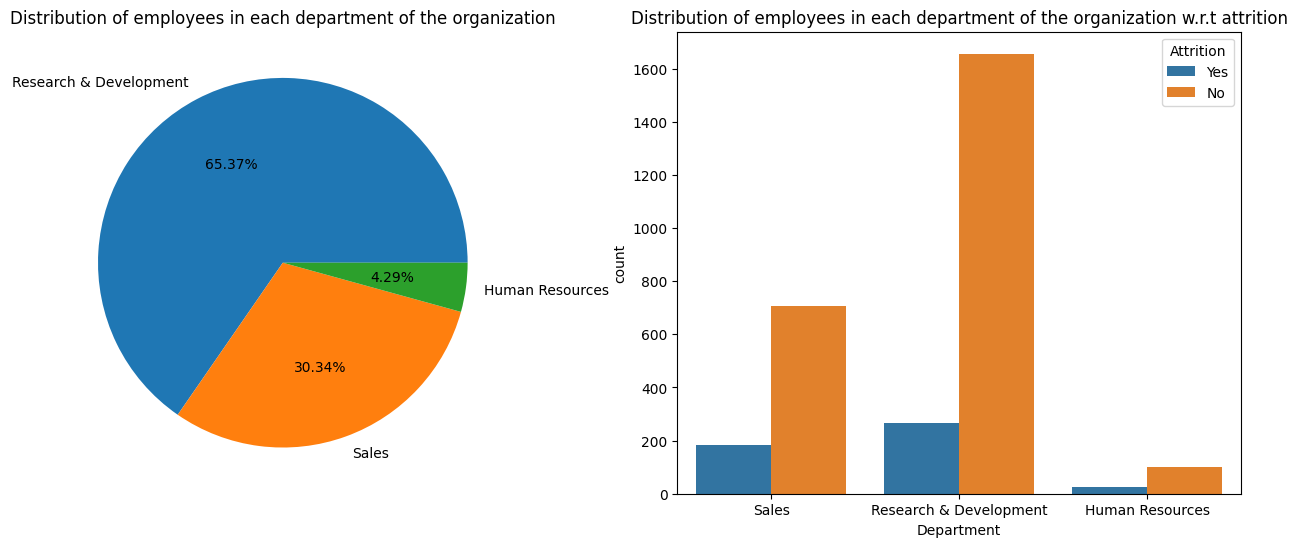

In [17]:
# visualizing departments

plt.subplots(1,2,figsize=(16,6))

plt.subplot(1,2,1)
plt.pie(x=df1['Department'].value_counts(),labels=df1['Department'].value_counts().index,autopct='%0.2f%%')
plt.title('Distribution of employees in each department of the organization')

plt.subplot(1,2,2)
sns.countplot(x=df1['Department'],hue=df1['Attrition'])
plt.title('Distribution of employees in each department of the organization w.r.t attrition')
plt.show()

In [18]:
pd.crosstab(df1['Attrition'],df1['Department'])

Department  Human Resources  Research & Development  Sales
Attrition                                                 
No                      102                    1656    708
Yes                      24                     266    184

### Insight 3:

### *From the above study we can see that even though there is a big difference in the no. of employees between research & development and sales department the amount of attrition is quite high for sales, that is the amount of attrition in research & development department is around 14% while in sales department it is around 21% .
### *Also human resource department has very low number of employees compared to other two still it has got close 19% attrition rate.
### *This concludes that the sales and human resource department has quite high level of attrition rate and appropriate measures should be taken to control that.

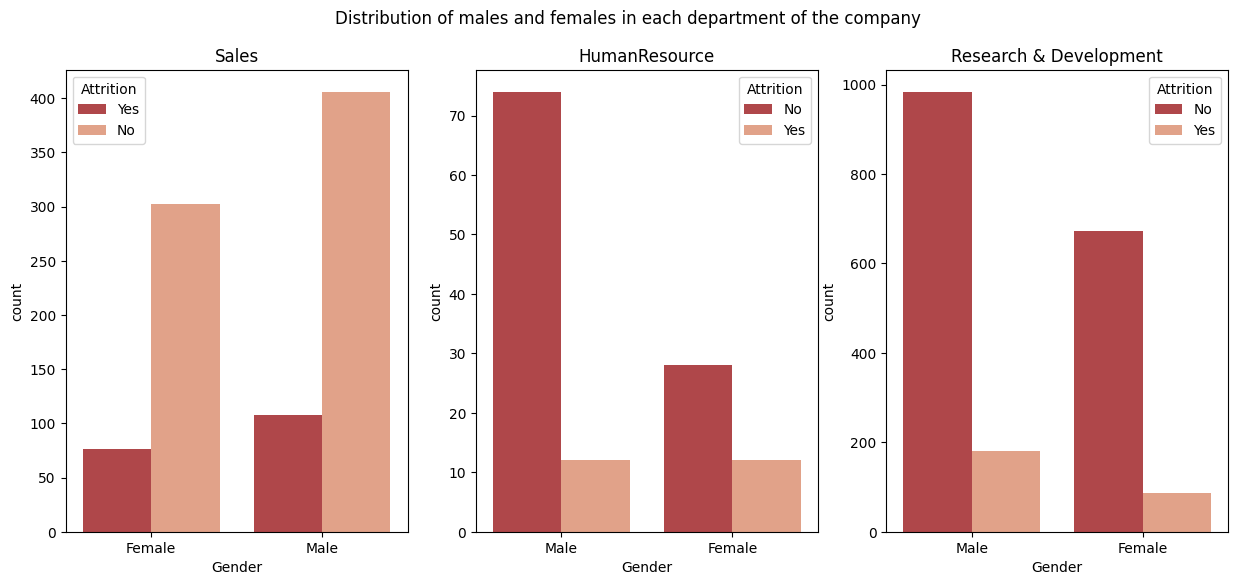

In [19]:
# visulaizing distribution of each department based on gender.

plt.subplots(1,3,figsize=(15,6))
plt.suptitle('Distribution of males and females in each department of the company')

# sales
plt.subplot(1,3,1)
sns.countplot(x=sales['Gender'],hue=sales['Attrition'],palette=sns.color_palette('RdBu'))
plt.title('Sales')

# Human Resource
plt.subplot(1,3,2)
sns.countplot(x=hr['Gender'],hue=hr['Attrition'],palette=sns.color_palette('RdBu'))
plt.title('HumanResource')

# Research & Development
plt.subplot(1,3,3)
sns.countplot(x=rd['Gender'],hue=rd['Attrition'],palette=sns.color_palette('RdBu'))
plt.title('Research & Development')
plt.show()

In [20]:
# frequency table w.r.t attrition for each department
print('Sales department:\n')
print(pd.crosstab(sales['Gender'],sales['Attrition']),'\n')
print('Human resource department:\n')
print(pd.crosstab(hr['Gender'],hr['Attrition']),'\n')
print('Research & development department:\n')
print(pd.crosstab(rd['Gender'],rd['Attrition']),'\n')

Sales department:

Attrition   No  Yes
Gender             
Female     302   76
Male       406  108 

Human resource department:

Attrition  No  Yes
Gender            
Female     28   12
Male       74   12 

Research & development department:

Attrition   No  Yes
Gender             
Female     672   86
Male       984  180 



### Insight 4:
### *Here we see clearly that 30% of the female employees of human resource department left the company, the number of employees in human resource department are are already very low hence something needs to be done for stopping further attrition especially of female employees from human resource department of the company.

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 59.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


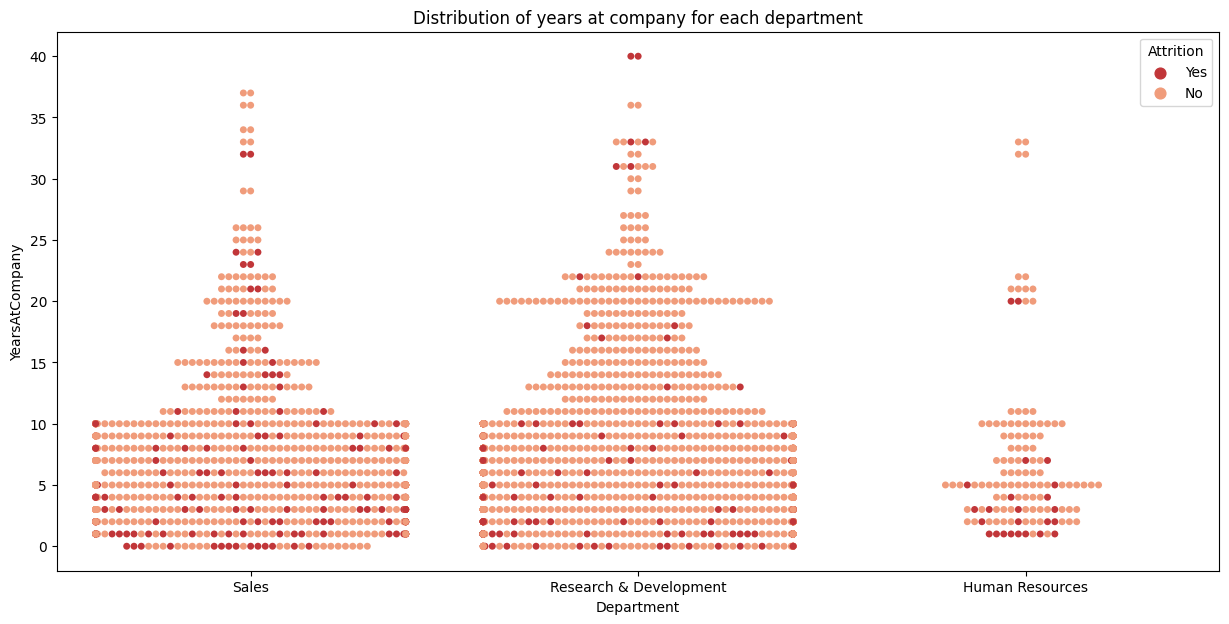

In [21]:
# years at company for each department
plt.figure(figsize=(15,7))
sns.swarmplot(x=df1['Department'],y=df1['YearsAtCompany'],hue=df1['Attrition'],palette=sns.color_palette('RdBu'))
plt.title('Distribution of years at company for each department')
plt.show()

### Insight 5:
### *From the above plot we can see that majority of the attritions in Sales and Research & Development department are from employees with 0 to 10 years at the company.

In [22]:
# basic statistics of EnvironmentSatisfaction feature
df1['EnvironmentSatisfaction'].describe()

count    2940.000000
mean        2.721769
std         1.092896
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: EnvironmentSatisfaction, dtype: float64

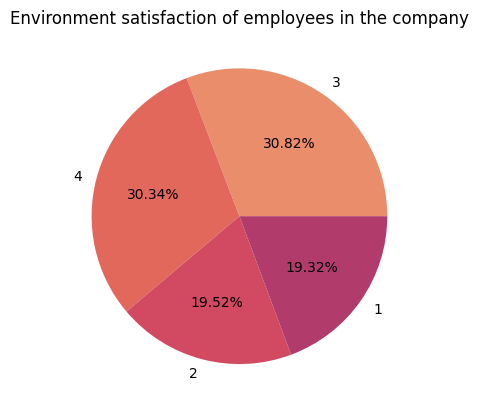

In [23]:
# distribution of EnvironmentSatisfaction for the employees of the company
plt.pie(x=df1['EnvironmentSatisfaction'].value_counts(),
        labels=df1['EnvironmentSatisfaction'].value_counts().index,
        autopct='%0.2f%%',
        colors=sns.color_palette('flare'))
plt.title('Environment satisfaction of employees in the company')
plt.show()

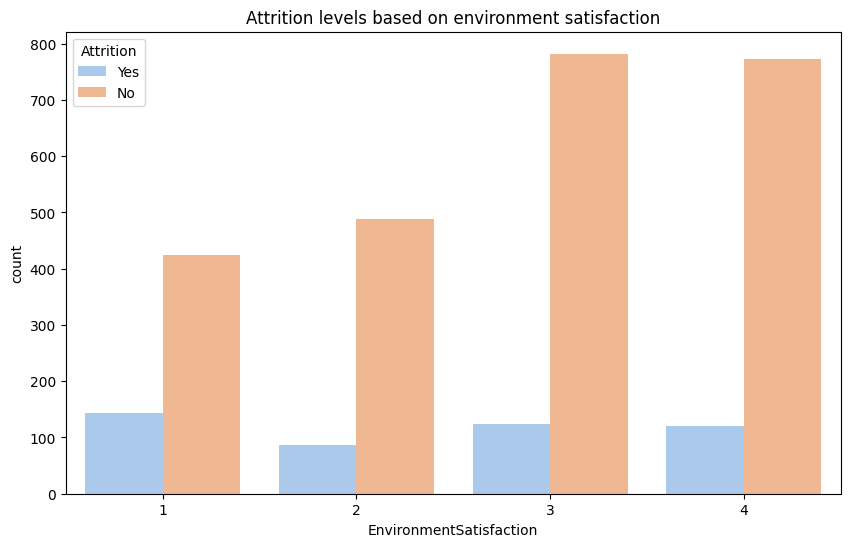

In [24]:
# attrition w.r.t amount of environment satisfaction of employees
plt.figure(figsize=(10,6))
sns.countplot(x=df1['EnvironmentSatisfaction'],hue=df1['Attrition'],palette=sns.color_palette('pastel'))
plt.title('Attrition levels based on environment satisfaction')
plt.show()

In [25]:
# frequency table of attrition and level of environment satisfaction
pd.crosstab(df1['Attrition'],df1['EnvironmentSatisfaction'])

EnvironmentSatisfaction    1    2    3    4
Attrition                                  
No                       424  488  782  772
Yes                      144   86  124  120

### Insight 6:
### *We see that employees with the lowest satisfaction level of 1 has the highest rate of attrition of approximately 25%, hence appropriate actions must be taken to enhance their level of environment satisfaction.

In [26]:
# statistics for gender variable
df1['Gender'].describe()

count     2940
unique       2
top       Male
freq      1764
Name: Gender, dtype: object

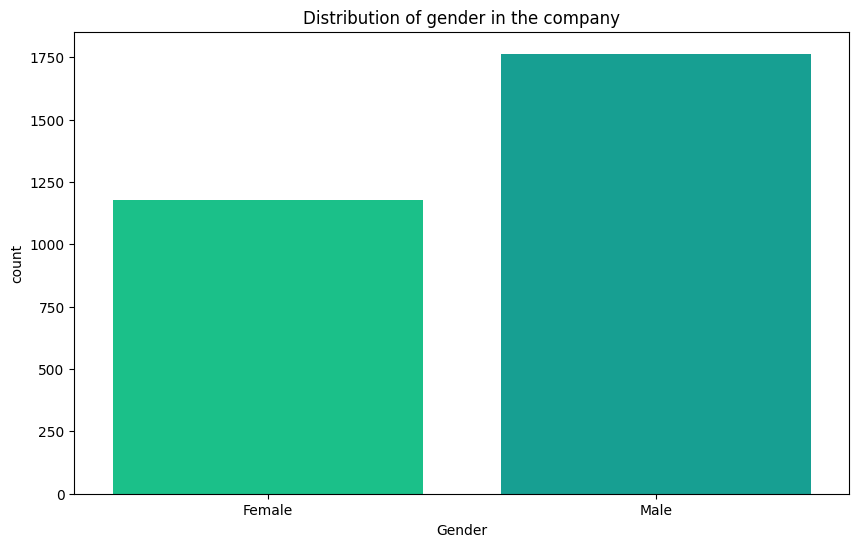

In [27]:
# gender distribution
plt.figure(figsize=(10,6))
sns.countplot(x=df1['Gender'],palette=sns.color_palette('winter_r'))
plt.title('Distribution of gender in the company')
plt.show()

In [28]:
# frequency table of gender w.r.t attrition
pd.crosstab(df1['Gender'],df1['Attrition'])

Attrition    No  Yes
Gender              
Female     1002  174
Male       1464  300

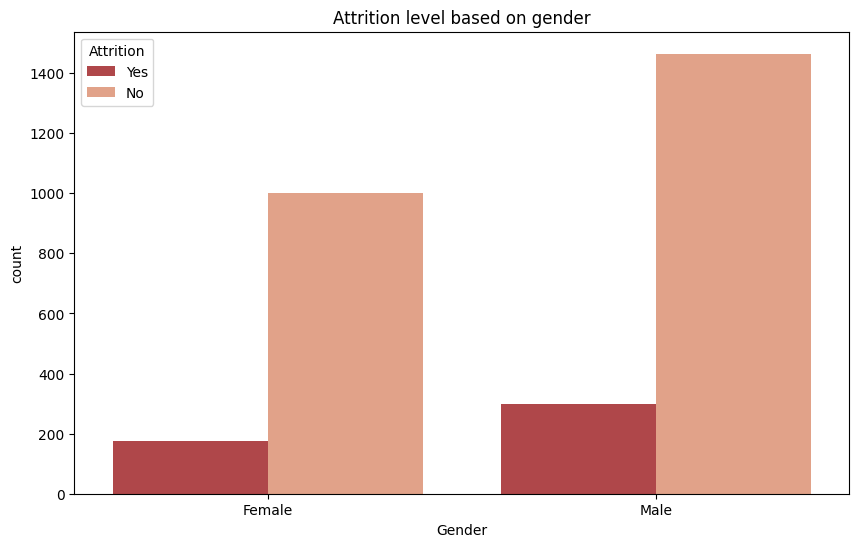

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(x=df1['Gender'],hue=df1['Attrition'],palette=sns.color_palette('RdBu'))
plt.title('Attrition level based on gender')
plt.show()

In [30]:
# statistics for job level
print('Statistics for joblevel:\n')
df1['JobLevel'].describe()

Statistics for joblevel:



count    2940.000000
mean        2.063946
std         1.106752
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: JobLevel, dtype: float64

In [31]:
# frequency table of attrition w.r.t job level
pd.crosstab(df1['JobLevel'],df1['Attrition'])

Attrition   No  Yes
JobLevel           
1          800  286
2          964  104
3          372   64
4          202   10
5          128   10

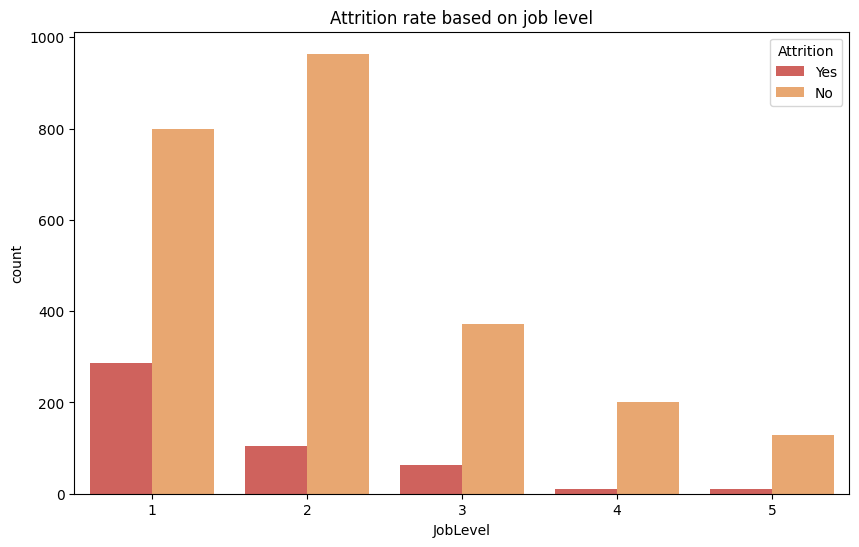

In [32]:
# visualization of level of attrition w.r.t job level
plt.figure(figsize=(10,6))
sns.countplot(x=df1['JobLevel'],hue=df1['Attrition'],palette=sns.color_palette('Spectral'))
plt.title('Attrition rate based on job level')
plt.show()

### Insight 7:
### * From the above study we see that the lowest level job of unit 1 has the highest level of attrition of approximately 26%, that is high number of people at job level 1 are leaving the company and something must be done to stop such further attritions.

In [33]:
# important statistics for monthly income
print('Statistics for feature monthly income:\n')
df1['MonthlyIncome'].describe()

Statistics for feature monthly income:



count     2940.000000
mean      6502.931293
std       4707.155770
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8380.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

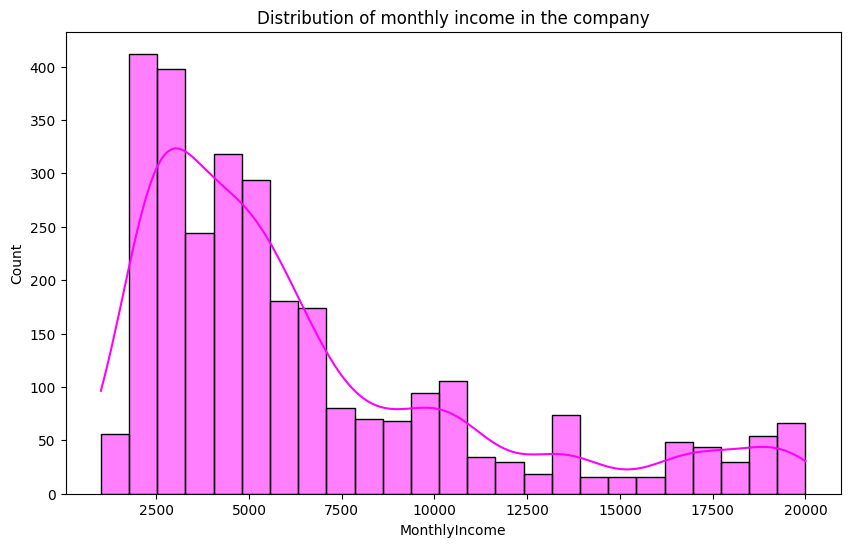

In [34]:
# monthly income feature distribution
plt.figure(figsize=(10,6))
sns.histplot(df1['MonthlyIncome'],kde=True,color='magenta')
plt.title('Distribution of monthly income in the company')
plt.show()

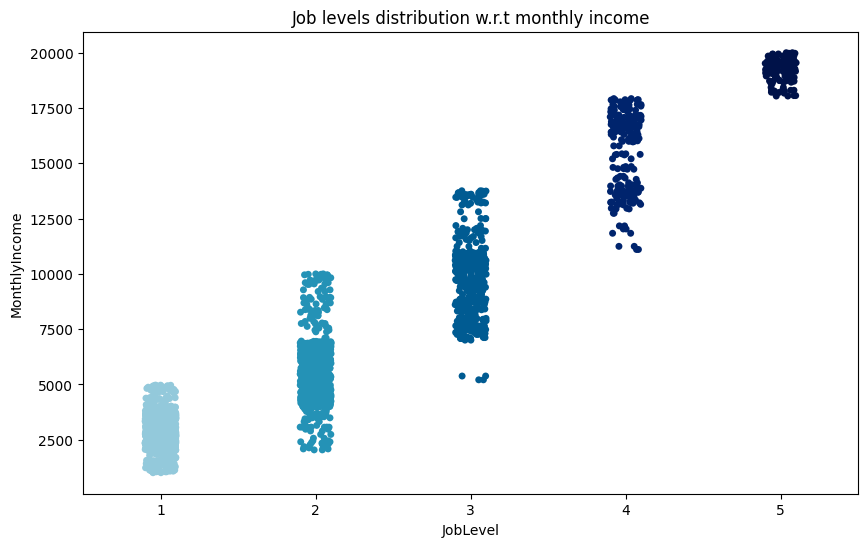

In [35]:
# distribution of joblevel w.r.t monthly income
plt.figure(figsize=(10,6))
sns.stripplot(x=df1['JobLevel'],y=df1['MonthlyIncome'],palette=sns.color_palette('ocean_r'))
plt.title('Job levels distribution w.r.t monthly income')
plt.show()

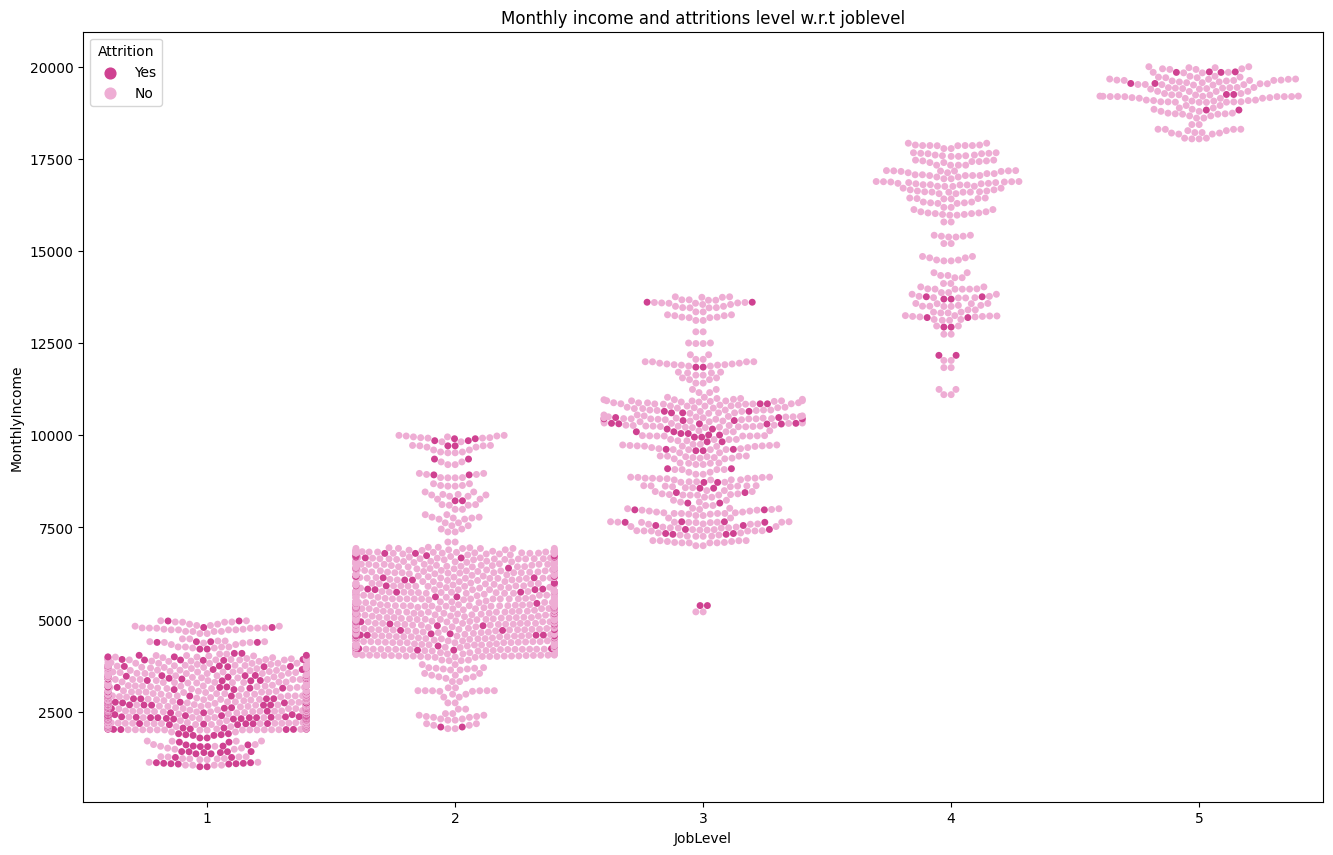

In [36]:
# plotting monthly income and level of attritions at various job level
plt.figure(figsize=(16,10))
sns.swarmplot(y=df1['MonthlyIncome'],x=df1['JobLevel'],hue=df1['Attrition'],palette=sns.color_palette('PiYG'))
plt.title('Monthly income and attritions level w.r.t joblevel')
plt.show()

# suppressing warnings
warnings.filterwarnings('ignore')

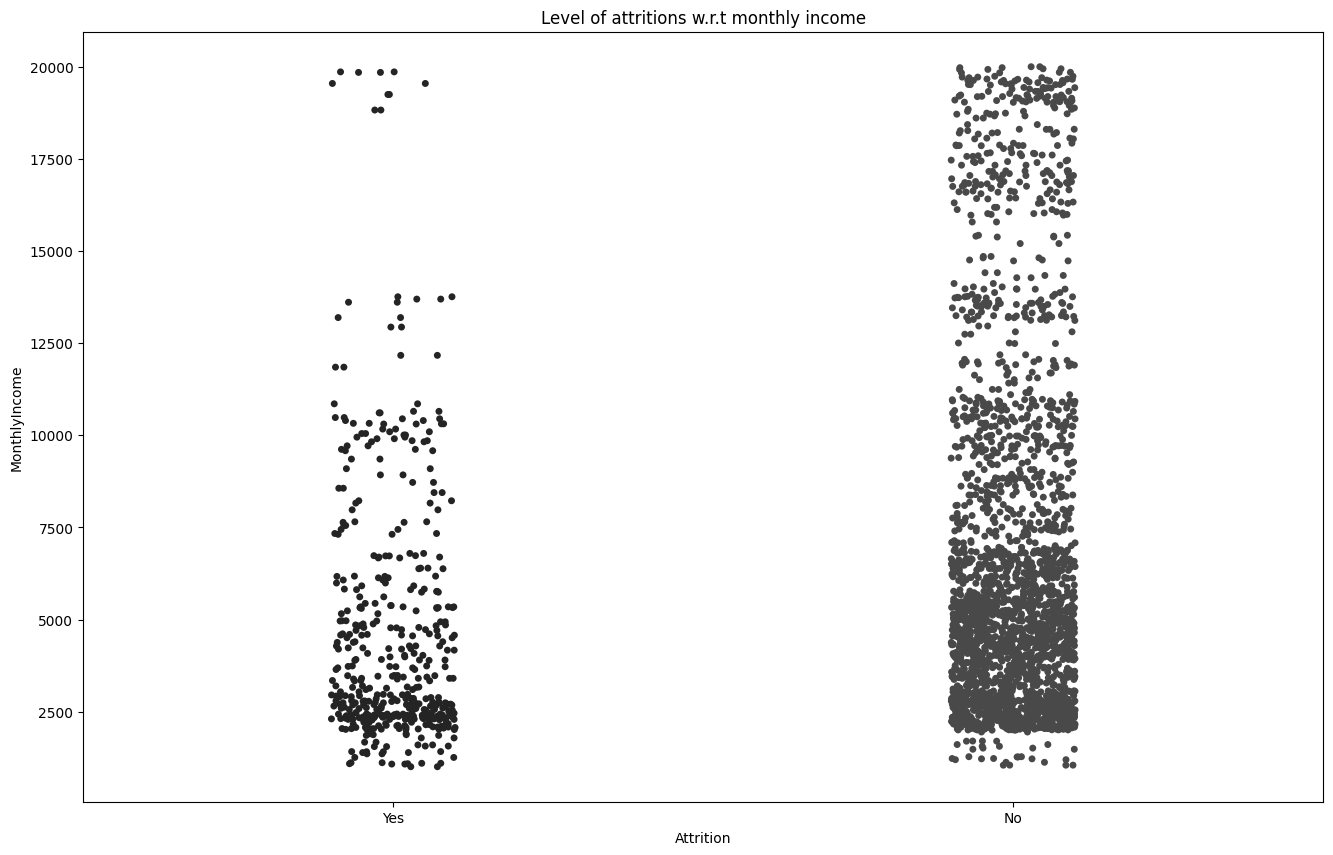

In [37]:
plt.figure(figsize=(16,10))
sns.stripplot(x=df1['Attrition'],y=df1['MonthlyIncome'],palette=sns.color_palette('gist_gray'))
plt.title('Level of attritions w.r.t monthly income')
plt.show()

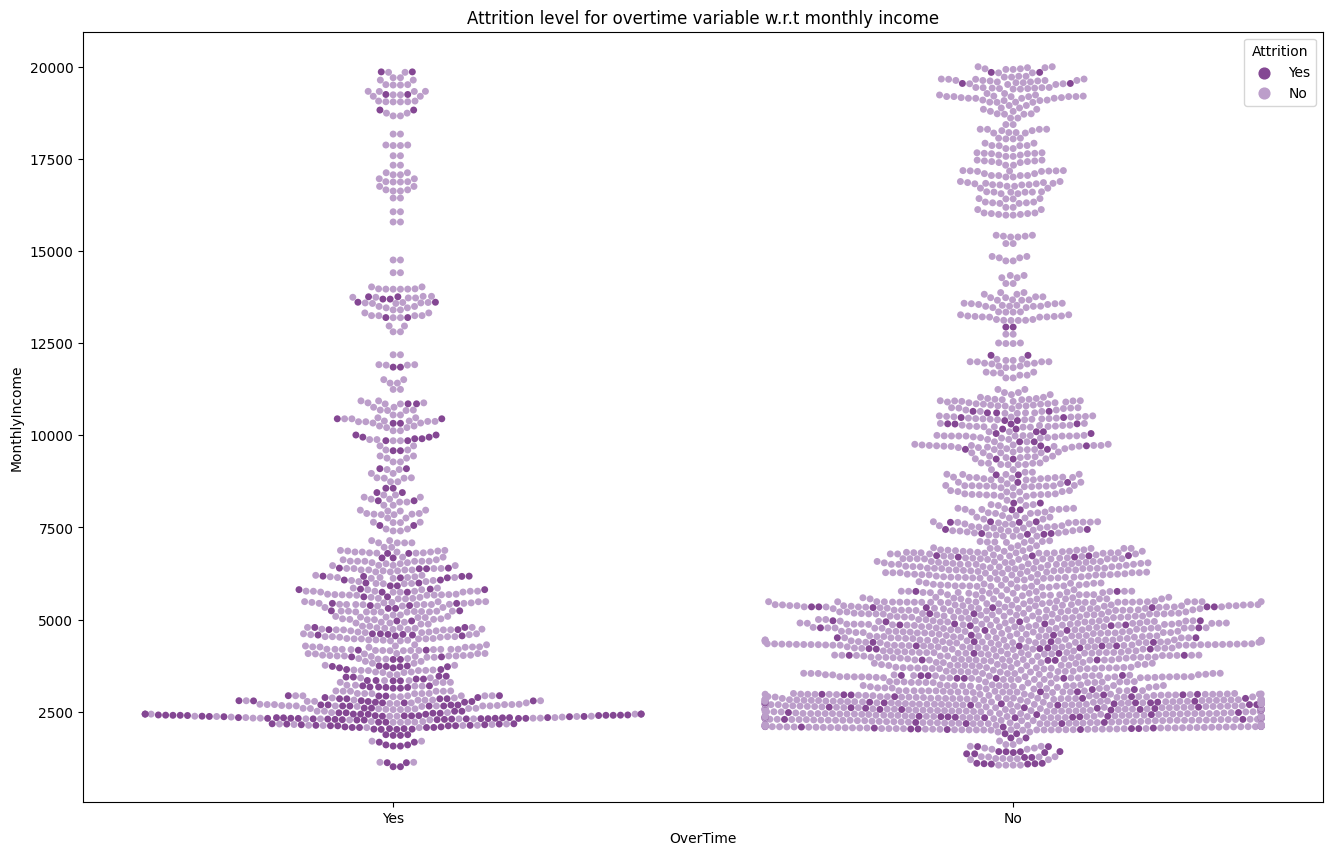

In [38]:
# plotting monthly income w.r.t overtime variable
plt.figure(figsize=(16,10))
sns.swarmplot(x=df1['OverTime'],y=df1['MonthlyIncome'],hue=df1['Attrition'],palette=sns.color_palette('PRGn'))
plt.title('Attrition level for overtime variable w.r.t monthly income')
plt.show()

### Insight 8:
### *The above study states that the data of monthly income of the company is right skewed, that is very high number of people are getting paid between between 1500 to 8000.
### *we see that very high no. attritions are taking place in the range of 1500 to 3500 of monthly income, especially the people who are working overtime and at job level 1 in the company.
### *We also see that as the monthly income increases the level of attrition tends to decrease quite a lot.

In [39]:
# statistics regarding job satisfaction
df1['OverTime'].describe()

count     2940
unique       2
top         No
freq      2108
Name: OverTime, dtype: object

In [40]:
pd.crosstab(df1['Attrition'],df1['OverTime'])

OverTime     No  Yes
Attrition           
No         1888  578
Yes         220  254

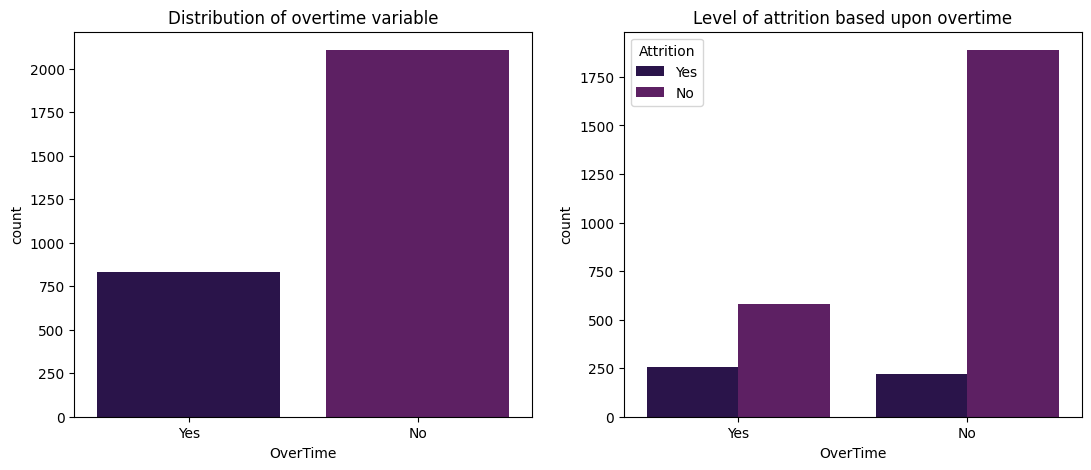

In [41]:
# visualizations for overtime variable

plt.subplots(1,2,figsize=(13,5))

plt.subplot(1,2,1)
sns.countplot(x=df1['OverTime'],palette=sns.color_palette('inferno'))
plt.title('Distribution of overtime variable')

plt.subplot(1,2,2)
sns.countplot(x=df1['OverTime'],hue=df1['Attrition'],palette=sns.color_palette('inferno'))
plt.title('Level of attrition based upon overtime')
plt.show()

### Insight 9:
### *After studying the overtime variable we see that 30% of the employees that did overtime left the company, also if we see carefully we see that even though the no. of employees that do overtime are very low as compared to the no. of employees that do not however the no. of employee attrition is still higher for people who do overtime which is a strong indicator of the significant no. of attritions for the employees that do overtime, hence necessary steps must be taken to stop further such attritions.

In [42]:
# statistics regarding percent salary hike
print(df1['PercentSalaryHike'].describe())

count    2940.000000
mean       15.209524
std         3.659315
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64


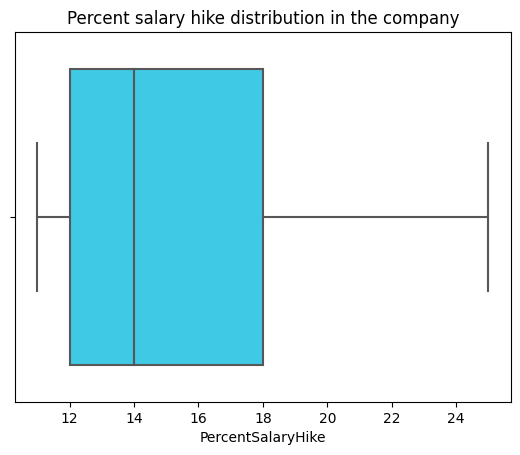

In [43]:
# distribution of percent salary hike in the company
sns.boxplot(df1['PercentSalaryHike'],palette=sns.color_palette('cool'))
plt.title('Percent salary hike distribution in the company')
plt.show()

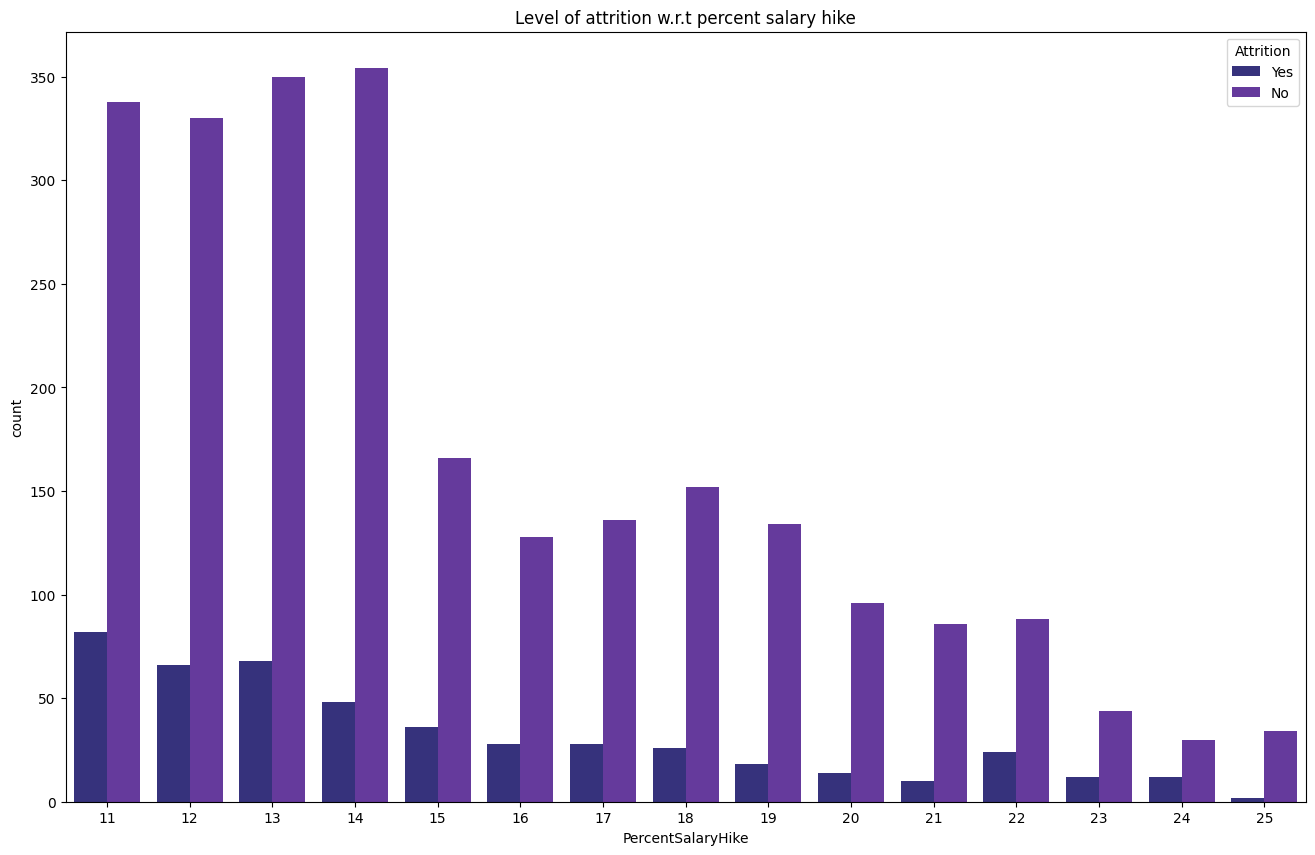

In [44]:
# attrition level w.r.t percent salary hike
plt.figure(figsize=(16,10))
sns.countplot(x=df1['PercentSalaryHike'],hue=df1['Attrition'],palette=sns.color_palette('CMRmap'))
plt.title('Level of attrition w.r.t percent salary hike')
plt.show()

### *We see that the percentsalaryhike for the company is right skewed which makes sense as very few employees will be performing very well and hence very few will be getting high percent salary hike, also as we see as the percent salary hike goes higher and higher the attrition level tends to decrease further.

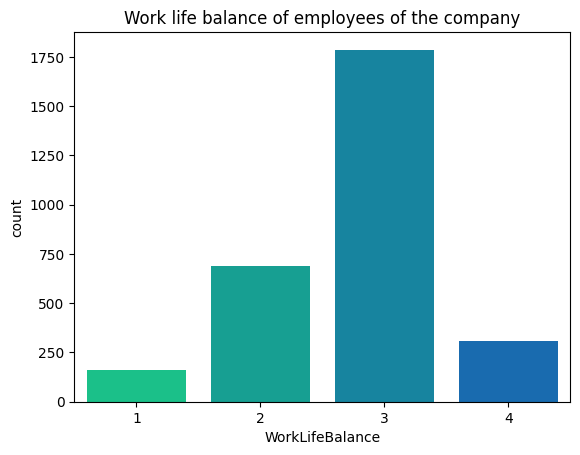

In [45]:
# distribution of work life balance in the organization
sns.countplot(df1['WorkLifeBalance'],palette=sns.color_palette('winter_r'))
plt.title('Work life balance of employees of the company')
plt.show()

In [46]:
# frequency table for work life balance w.r.t attrition
pd.crosstab(df1['Attrition'],df1['WorkLifeBalance'])

WorkLifeBalance    1    2     3    4
Attrition                           
No               110  572  1532  252
Yes               50  116   254   54

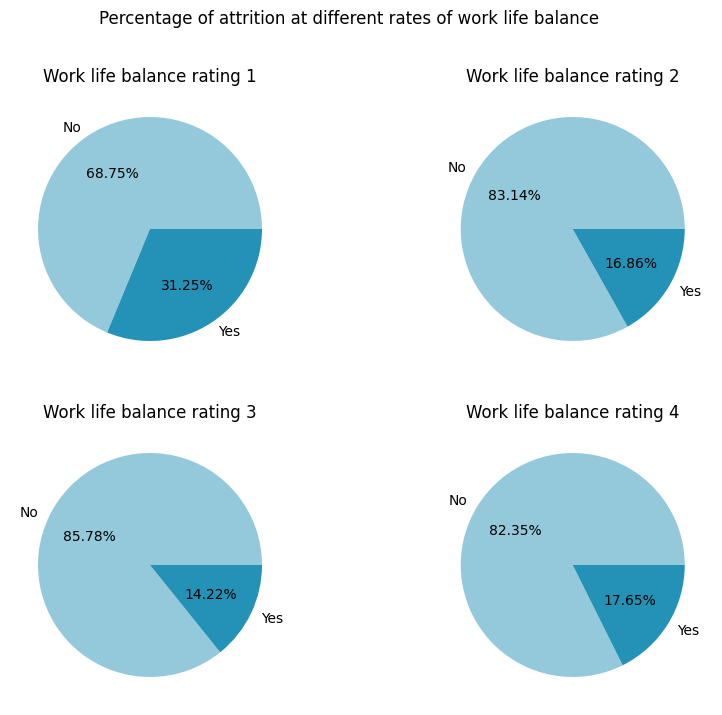

In [47]:
# attrition levels at different levels of work life balance

plt.subplots(2,2,figsize=(10,8))
plt.suptitle('Percentage of attrition at different rates of work life balance')

# rating 1
plt.subplot(2,2,1)
plt.pie(x=df1['Attrition'][df1['WorkLifeBalance']==1].value_counts(),
        labels=df1['Attrition'][df1['WorkLifeBalance']==1].value_counts().index,
        autopct='%0.2f%%',
        colors=sns.color_palette('ocean_r'))
plt.title('Work life balance rating 1')

# rating 2
plt.subplot(2,2,2)
plt.pie(x=df1['Attrition'][df1['WorkLifeBalance']==2].value_counts(),
        labels=df1['Attrition'][df1['WorkLifeBalance']==2].value_counts().index,
        autopct='%0.2f%%',
        colors=sns.color_palette('ocean_r'))
plt.title('Work life balance rating 2')

# rating 3
plt.subplot(2,2,3)
plt.pie(x=df1['Attrition'][df1['WorkLifeBalance']==3].value_counts(),
        labels=df1['Attrition'][df1['WorkLifeBalance']==3].value_counts().index,
        autopct='%0.2f%%',
        colors=sns.color_palette('ocean_r'))
plt.title('Work life balance rating 3')

# rating 4
plt.subplot(2,2,4)
plt.pie(x=df1['Attrition'][df1['WorkLifeBalance']==4].value_counts(),
        labels=df1['Attrition'][df1['WorkLifeBalance']==4].value_counts().index,
        autopct='%0.2f%%',
        colors=sns.color_palette('ocean_r'))
plt.title('Work life balance rating 4')
plt.show()

### Insight 10:
### *From the above study & visualizations we see that even though there are very low number of employees with work life balance of 1 still a significantly high percentage of employees with work life balance of 1, approximately 31%, are leaving the company, hence to stop such further attritions appropriate steps must be taken to improve the work life balance of these employees.

In [48]:
# basic statistics for years at company
print('Statistics for years at company:\n')
print(df1['YearsAtCompany'].describe())

Statistics for years at company:

count    2940.000000
mean        7.008163
std         6.125483
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64


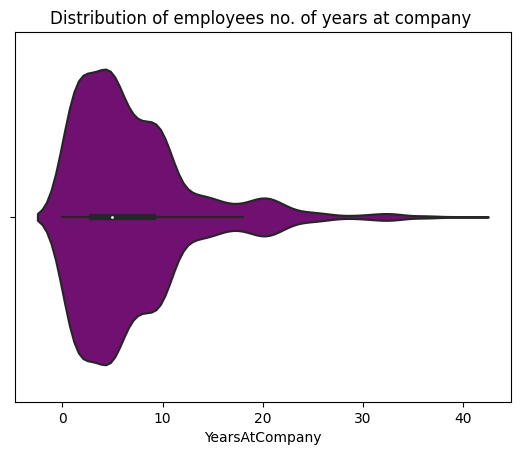

In [49]:
# plotting variable: years at company
sns.violinplot(df1['YearsAtCompany'],color='purple')
plt.title('Distribution of employees no. of years at company ')
plt.show()

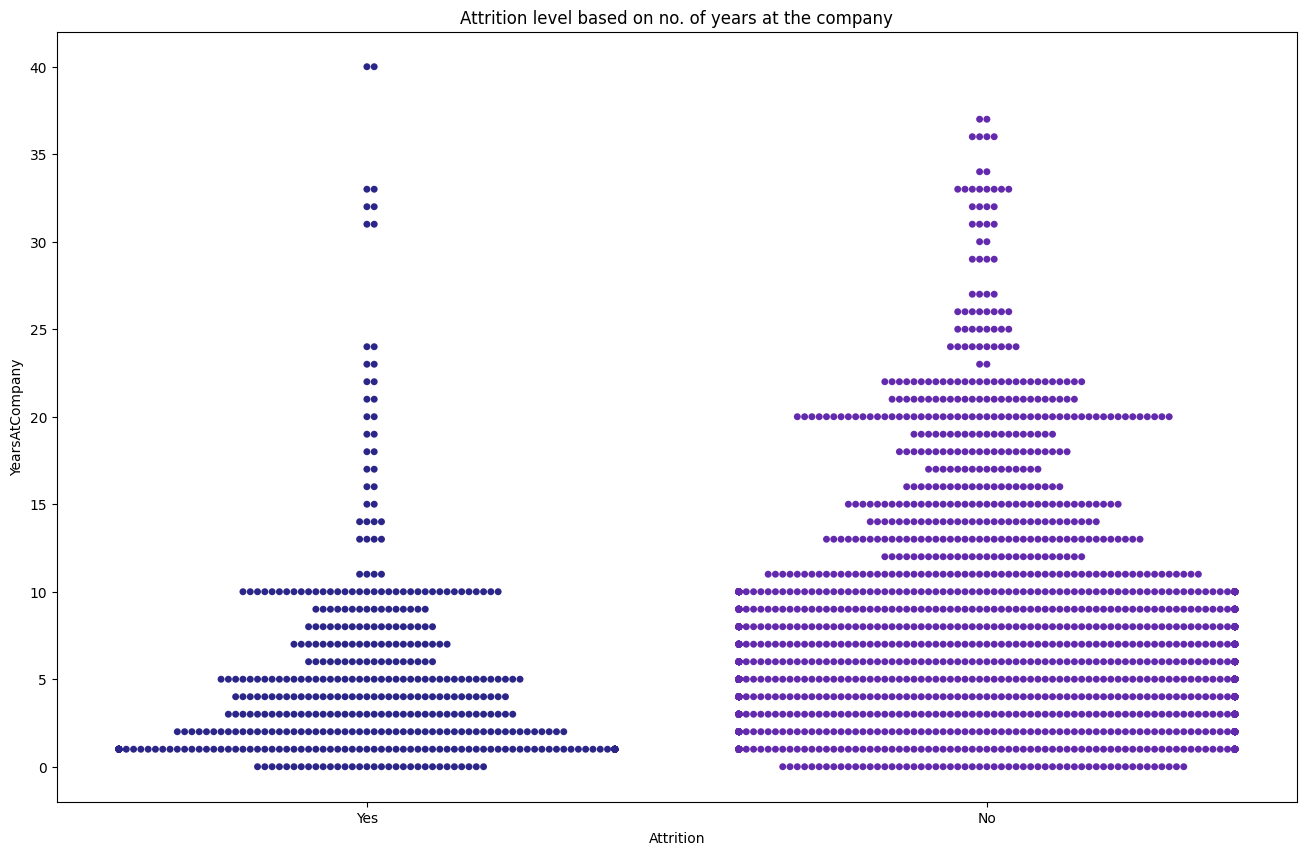

In [50]:
# level of attrition w.r.t no. of years at company
plt.figure(figsize=(16,10))
sns.swarmplot(y=df1['YearsAtCompany'],x=df1['Attrition'],palette=sns.color_palette('CMRmap'))
plt.title('Attrition level based on no. of years at the company')
plt.show()

### Insight 11:
### *We see very high levels of attrition w.r.t the employees that were in the company for 0 to 10 years after that the attrition level drops drastically so to stop further attritions some steps must be taken to retain such employees.

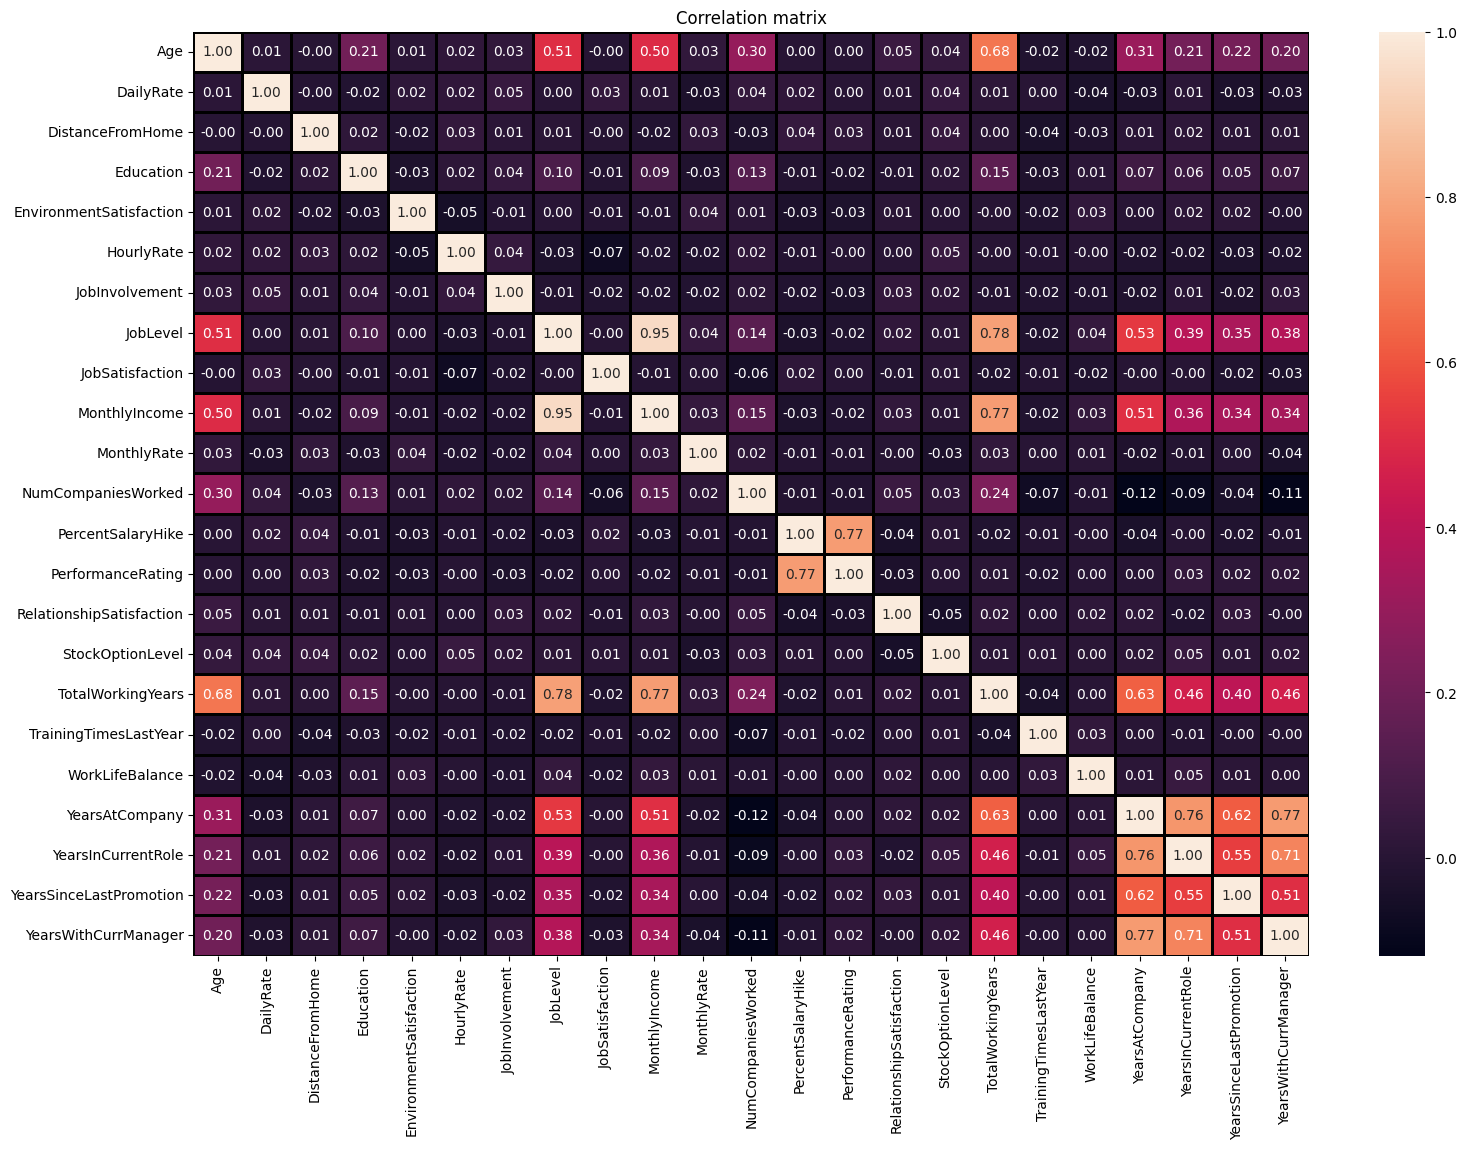

In [51]:
# lets check for correlation among the variables and derive some more insights among the features.

# heatmap stating the correlation among the variables
plt.figure(figsize=(18,12))
sns.heatmap(df1.corr(),annot=True,fmt='0.2f',linewidth=1,linecolor='black')
plt.title('Correlation matrix')
plt.show()

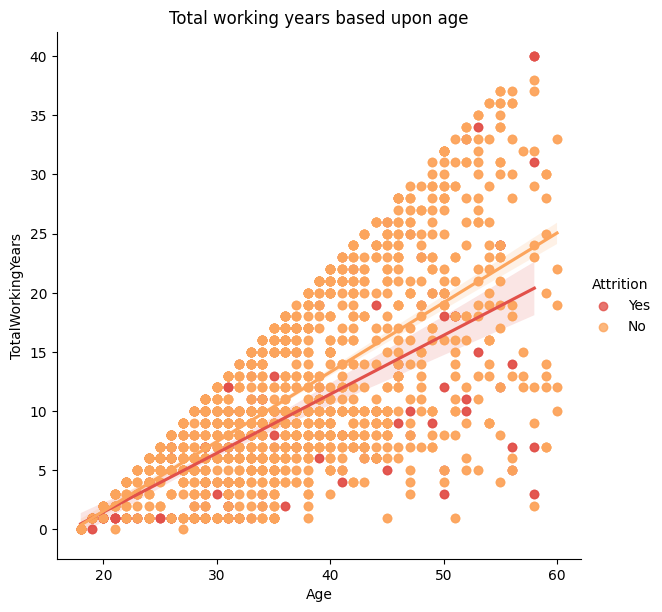

In [52]:
# scatterplot for totalworkingyears and age
sns.lmplot(y='TotalWorkingYears',x='Age',hue='Attrition',data=df1,height=6,palette=sns.color_palette('Spectral'))
plt.title('Total working years based upon age')
plt.show()

### Insight 12:
### *From the previous correlation matrix we saw that there is 0.68 of correlation among age & totalworkingyears, then from the above scatterplot we see that as the age of the employee increases they generally tend to stick for more number of years in the comapny.

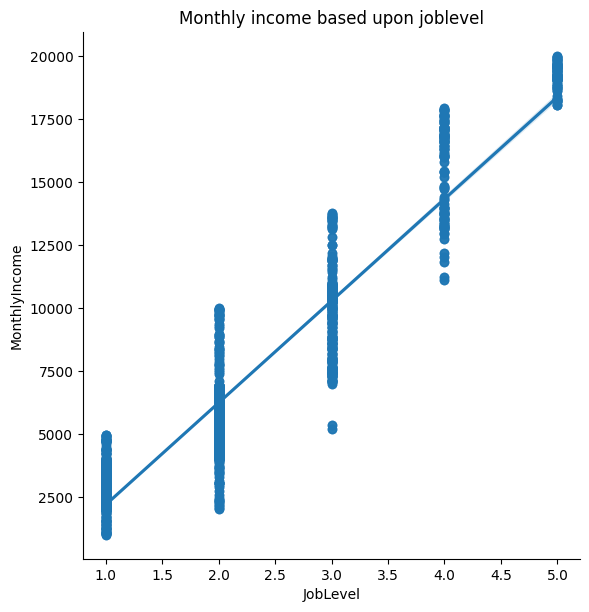

In [53]:
sns.lmplot(x='JobLevel',y='MonthlyIncome',data=df1,height=6)
plt.title('Monthly income based upon joblevel')
plt.show()

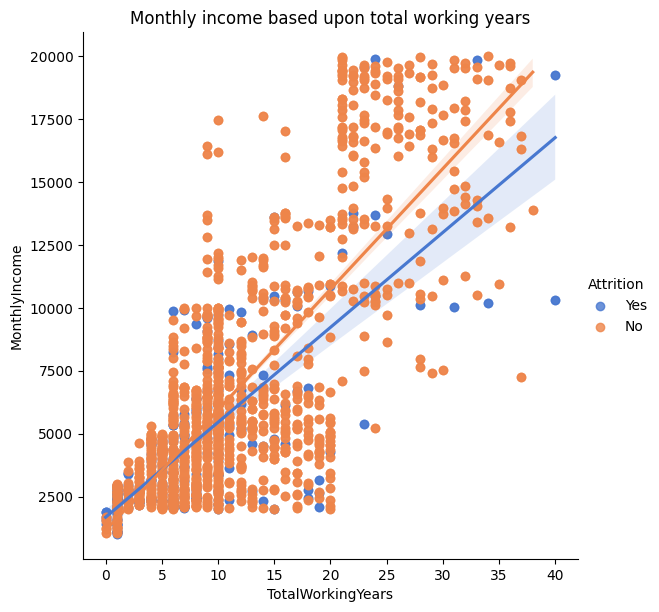

In [54]:
sns.lmplot(x='TotalWorkingYears',y='MonthlyIncome',hue='Attrition',data=df1,height=6,palette=sns.color_palette('muted'))
plt.title('Monthly income based upon total working years')
plt.show()

### *here we saw a 0.95 correlation of joblevel and monthly income and as we see above as the joblevel increases range of monthly income of the employee also increases, which makes sense as higher the level of the job, higher the monthly income one would expect, similarly we also see 0.77 correlation between total working years and monthly income which again does makes sense as the total working years of an employee increases the monthly income also tends to increase.

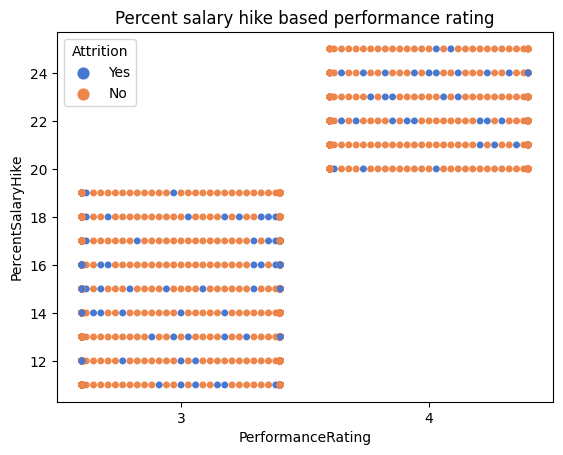

In [55]:
# swarmplot for performance rating and percent salary hike
sns.swarmplot(x=df1['PerformanceRating'],y=df1['PercentSalaryHike'],hue=df1['Attrition'],palette=sns.color_palette('muted'))
plt.title('Percent salary hike based performance rating')
plt.show()

### *we see that the performance rating is 0.77 correlated with percent salary hike that is with a performance rating of 3 the employees get a salary hike in range of 10% to 19% however with a performance rating of 4 the employees get a salary hike in the range of 20% to 25%.

# 5- Model Building

## 5.1- Data Preprocessing

In [56]:
# Feature Engineering

# label encoding categorical columns
le=LabelEncoder()

# using for loop to label encode all categorical columns(dtype=='object') at once.
for n in df1.columns:
    if df1[str(n)].dtype=='object':
        df1[str(n)]=le.fit_transform(df1[str(n)])

In [57]:
df1

Age  Attrition  BusinessTravel  DailyRate  Department  \
EmployeeNumber                                                          
1                41          1               2       1102           2   
2                49          0               1        279           1   
3                37          1               2       1373           1   
4                33          0               1       1392           1   
5                27          0               2        591           1   
...             ...        ...             ...        ...         ...   
2936             36          0               1        884           1   
2937             39          0               2        613           1   
2938             27          0               2        155           1   
2939             49          0               1       1023           2   
2940             34          0               2        628           1   

                DistanceFromHome  Education  EducationField  \
EmployeeNumber                                                
1                              1          2               1   
2                              8          1               1   
3                              2          2               4   
4                              3          4               1   
5                              2          1               3   
...                          ...        ...             ...   
2936                          23          2               3   
2937                           6          1               3   
2938                           4          3               1   
2939                           2          3               3   
2940                           8          3               3   

                EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  \
EmployeeNumber                                                                
1                                     2       0          94               3   
2                                     3       1          61               2   
3                                     4       1          92               2   
4                                     4       0          56               3   
5                                     1       1          40               3   
...                                 ...     ...         ...             ...   
2936                                  3       1          41               4   
2937                                  4       1          42               2   
2938                                  2       1          87               4   
2939                                  4       1          63               2   
2940                                  2       1          82               4   

                JobLevel  JobRole  JobSatisfaction  MaritalStatus  \
EmployeeNumber                                                      
1                      2        7                4              2   
2                      2        6                2              1   
3                      1        2                3              2   
4                      1        6                3              1   
5                      1        2                2              1   
...                  ...      ...              ...            ...   
2936                   2        2                4              1   
2937                   3        0                1              1   
2938                   2        4                2              1   
2939                   2        7                2              1   
2940                   2        2                3              1   

                MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
EmployeeNumber                                                             
1                        5993        19479                   8         1   
2                        5130        24907                   1         0   
3               

In [58]:
# we see some of the features highly correlated among each other, which we need to get rid of as the highly correlated 
# features make our model biased as when two or more features are similar they contribute similar amount to influence the
# target variable hence one feature is counted twice or multiple times making the model biased.

# so to deal with that issue i will take help of a function that i created in one of my initial assignments to deal with
# correlated features among the dataset.

def corr_var(df,y):
    '''
    This is a very robust function that takes a Pandas DataFrame as input and
    drops one of the features whose more than 75% of the data is correlated
    with another feature.
    This is done for all the features w.r.t each other
    until there are no correlated features left,
    finally after dropping all of the correlated columns
    it returns the DataFrame with all the correlated features removed.

    Additionally it also prints the features that are correlated
    to each other, to what degree are they correlated and
    the feature that is going to be dropped out of the two.

    input: DataFrame
    return: DataFrame without correlated features
    '''
    cor=df.corr()
    try:
        cor1=cor.drop([y],axis='index')
        cor2=cor1.drop([y],axis='columns')
    except KeyError as key:
        cor2=cor
    high_cor={}
    for n in cor2.columns:
        for i in cor2.index:
            if n!=i:
                if cor2.loc[n,i]>0.75 or cor2.loc[n,i]<-0.75:
                    high_cor[cor2.loc[n,i]]=[n,i] # mapping only the unique values of correlation using dictionary(that
                                            # is initialized above as high_cor),
                                            # as dictionary keys takes unique values and simultaneously mapping
                                            # the respective columns and rows
    drop_col=[]
    for a,b in high_cor.items():
        print(f'correlation of {round(a,2)} found in columns "{b[0]}" and "{b[1]}"---> dropping column "{b[0]}"')
        drop_col.append(b[0]) # appending the column names that are to be dropped in list initialized as drop_col
    return df.drop(drop_col,axis='columns')

In [59]:
df2=corr_var(df1,'Attrition')

correlation of 0.95 found in columns "MonthlyIncome" and "JobLevel"---> dropping column "MonthlyIncome"
correlation of 0.78 found in columns "TotalWorkingYears" and "JobLevel"---> dropping column "TotalWorkingYears"
correlation of 0.77 found in columns "TotalWorkingYears" and "MonthlyIncome"---> dropping column "TotalWorkingYears"
correlation of 0.77 found in columns "PerformanceRating" and "PercentSalaryHike"---> dropping column "PerformanceRating"
correlation of 0.76 found in columns "YearsInCurrentRole" and "YearsAtCompany"---> dropping column "YearsInCurrentRole"
correlation of 0.77 found in columns "YearsWithCurrManager" and "YearsAtCompany"---> dropping column "YearsWithCurrManager"


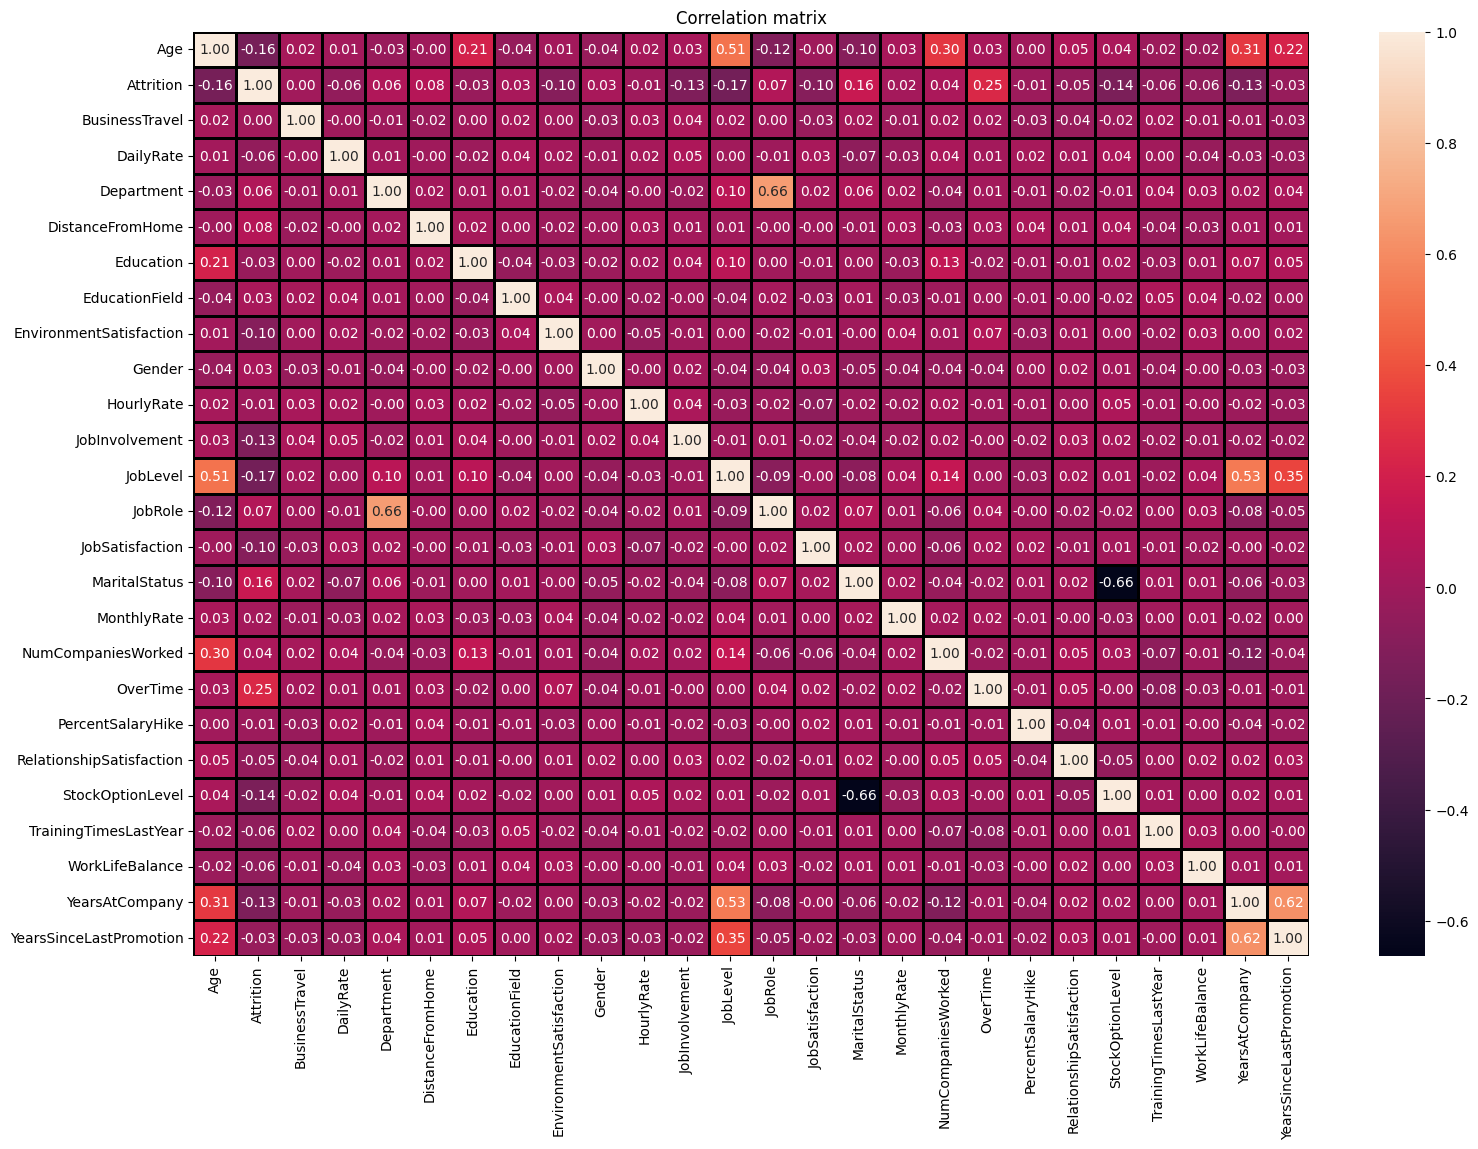

In [60]:
# we see using the function we have reduced our feature number from 31 to 26, hence removing all of the highly correlated
# columns, how does the function remove highly correlated features? for that refer to the function documentation.

# now lets check again for the correlation in our data.

plt.figure(figsize=(18,12))
sns.heatmap(df2.corr(),annot=True,fmt='0.2f',linewidth=1,linecolor='black')
plt.title('Correlation matrix')
plt.show()

In [61]:
# pretty clean! our data is now free of highly correlated features and we have converted the data to numeric format,
# lets now create a model that can predict the attrition based on data.

# before doing that lets first be clear on few important things, 1st thing lets address the fact that our data is imbalanced
# which we earlier saw at the start that how our data contains approximately 84% of negative class('no') and 16% of positive
# class('yes') which is not good as imbalaced data makes our model bias towards one class, however the imbalance is not too
# severe that we need to use different techniques to tackle it, we will keep a check on the f1-score which is a better
# evaluation metric when the data is imbalenced,we would also check how well does it predict the positive class which is the
# minority class here, if we see that the f1-score is not good enough and the model predicts the minority class poorly we
# would be bound to tackle the problem of imbalanced dataset using different techniques.

# secondly we would be creating CART algorithm(Decision Tree) as our benchmark model as that is very easy, has few
# parameters and does not really require standardization of data as it uses the concept gini impurity for classification
# which basicallly works with probabilities of the classes, then we would be trying with other machine learning algorithms
# based upon the performance of our model, we might even use grid search cv to come up with best performance parameters for
# different algorithms.

In [ ]:
sc=StandardScaler()
df3=df2.copy()
df3['Age']=sc.fit_transform(df3[['Age']])
df3['DailyRate']=sc.fit_transform(df3[['DailyRate']])
df3['DistanceFromHome']=sc.fit_transform(df3[['DistanceFromHome']])
df3['HourlyRate']=sc.fit_transform(df3[['HourlyRate']])
df3['MonthlyRate']=sc.fit_transform(df3[['MonthlyRate']])
df3['NumCompaniesWorked']=sc.fit_transform(df3[['NumCompaniesWorked']])
df3['PercentSalaryHike']=sc.fit_transform(df3[['PercentSalaryHike']])
df3['TrainingTimesLastYear']=sc.fit_transform(df3[['TrainingTimesLastYear']])
df3['YearsAtCompany']=sc.fit_transform(df3[['YearsAtCompany']])
df3['YearsSinceLastPromotion']=sc.fit_transform(df3[['YearsSinceLastPromotion']])

## 5.2- Train Test Split

In [62]:
# dividing our data into training and testing set.
x_train,x_test,y_train,y_test=train_test_split(df2.drop(['Attrition'],axis='columns'),
                                               df2['Attrition'],
                                               train_size=0.8,
                                               test_size=0.2,
                                               random_state=5)

## 5.3- The Model

In [63]:
# 10 fold cross validation score
cv=cross_val_score(estimator=DecisionTreeClassifier(),X=x_train,y=y_train,cv=10)
print('Average accuracy for the data using CART algorithm at 10 fold cross-validation:')
print(round(cv.mean(),2))

Average accuracy for the data using CART algorithm at 10 fold cross-validation:
0.94


###  *We see that the 10 fold cross validation gives an us an average accuracy of 94% which is pretty good, hence lets move ahead with the Decision Tree model further.

In [64]:
# creating and fitting the data to the model
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [65]:
# training data predictions
print(model.predict(x_train))

[0 0 1 ... 0 0 0]


In [66]:
# testing data predictions
print(model.predict(x_test))

[1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0
 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1
 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 

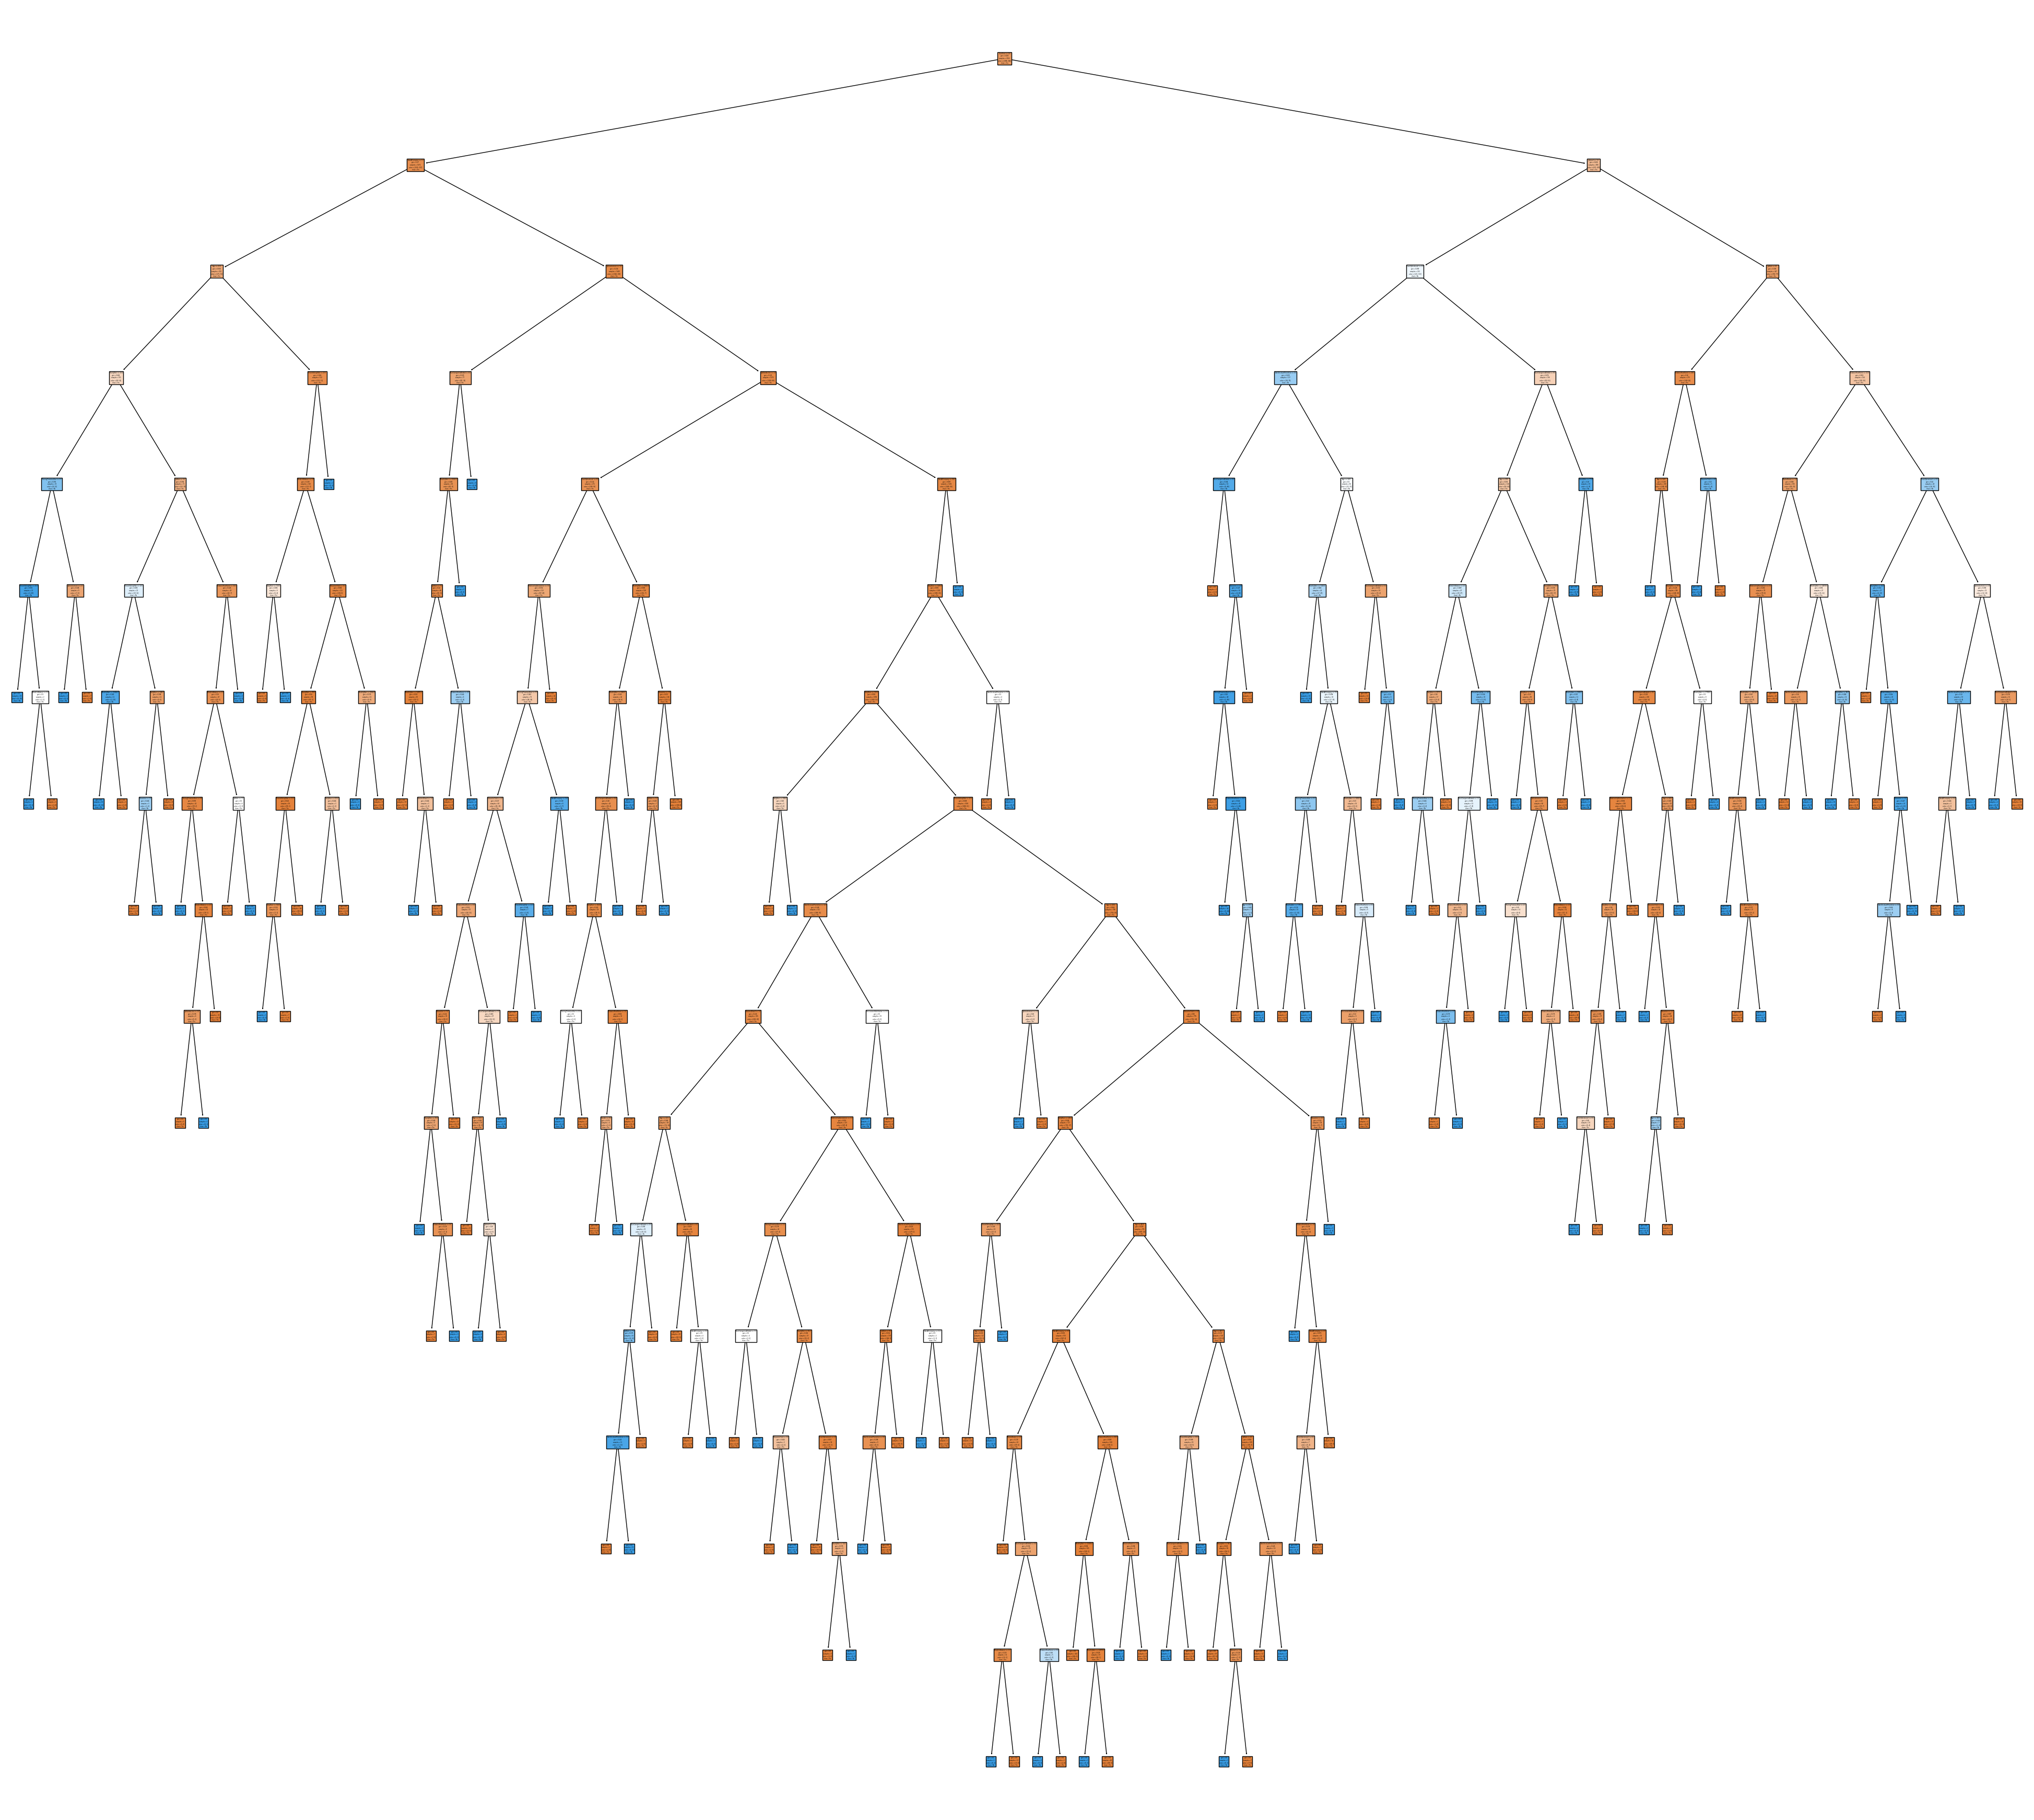

In [67]:
# visual representation of the model
plt.figure(figsize=(50,45))
plt.title('Vizualization of the CART tree to which the data was fitted')
tree.plot_tree(model,
               feature_names=df2.drop(['Attrition'],axis='columns').columns,
               class_names=df['Attrition'].unique(),
               filled=True)
plt.show()

In [68]:
# since in the above visual representation is not that clear this the text representation of the same.
print('Text representation of the above cart tree:\n')
print(tree.export_text(model,feature_names=list(df2.drop(['Attrition'],axis='columns').columns)))

Text representation of the above cart tree:

|--- OverTime <= 0.50
|   |--- YearsAtCompany <= 1.50
|   |   |--- Age <= 32.50
|   |   |   |--- HourlyRate <= 53.00
|   |   |   |   |--- TrainingTimesLastYear <= 3.50
|   |   |   |   |   |--- PercentSalaryHike <= 21.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- PercentSalaryHike >  21.00
|   |   |   |   |   |   |--- WorkLifeBalance <= 2.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- WorkLifeBalance >  2.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- TrainingTimesLastYear >  3.50
|   |   |   |   |   |--- JobInvolvement <= 2.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- JobInvolvement >  2.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- HourlyRate >  53.00
|   |   |   |   |--- JobRole <= 3.00
|   |   |   |   |   |--- PercentSalaryHike <= 13.50
|   |   |   |   |   |   |--- MonthlyRate <= 25892.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |  

## 5.4- Evaluation Metrics

In [69]:
# Accuracy

# train accuracy
print(f'Training data accuracy:\n{model.score(x_train,y_train)}')

# test accuracy
print(f'Testing data accuracy:\n{round(model.score(x_test,y_test),2)}')

Training data accuracy:
1.0
Testing data accuracy:
0.97


In [70]:
# predicted values for training set
y_train_pred=model.predict(x_train)

# predicted values for testing set
y_test_pred=model.predict(x_test)

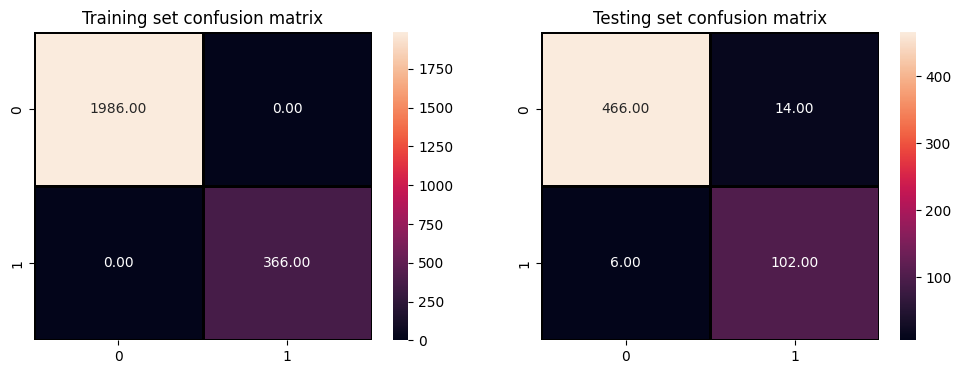

In [71]:
# confusion matrix
plt.subplots(1,2,figsize=(12,4))

# confusion matrix for training set
plt.subplot(1,2,1)
cm_train=confusion_matrix(y_train,y_train_pred)
sns.heatmap(cm_train,cmap='rocket',annot=True,fmt='0.2f',linewidth=1,linecolor='black')
plt.title('Training set confusion matrix')

# confusion matrix for testing set
plt.subplot(1,2,2)
cm_test=confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm_test,cmap='rocket',annot=True,fmt='0.2f',linewidth=1,linecolor='black')
plt.title('Testing set confusion matrix')

plt.show()

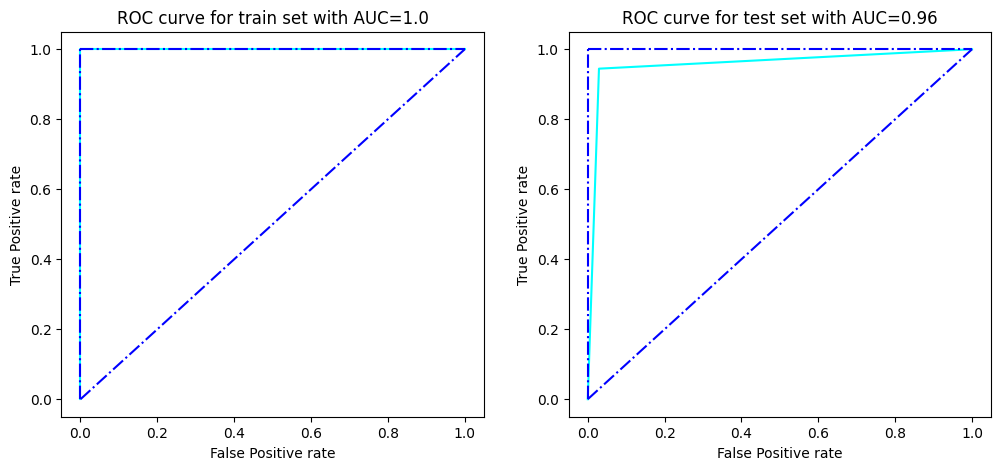

In [72]:
# ROC-AUC curve

train_fpr,train_tpr,threshold=roc_curve(y_train,y_train_pred)
test_fpr,test_tpr,threshold=roc_curve(y_test,y_test_pred)

plt.subplots(1,2,figsize=(12,5))

# ROC-AUC curve for training set
plt.subplot(1,2,1)
plt.plot(train_fpr,train_tpr,color='cyan')
plt.plot((0,0),(0,1),color='blue',linestyle='-.')
plt.plot((0,1),(1,1),color='blue',linestyle='-.')
plt.plot((0,1),(0,1),color='blue',linestyle='-.')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title(f'ROC curve for train set with AUC={auc(train_fpr,train_tpr)}')

# ROC-AUC curve for test set
plt.subplot(1,2,2)
plt.plot(test_fpr,test_tpr,color='cyan')
plt.plot((0,0),(0,1),color='blue',linestyle='-.')
plt.plot((0,1),(1,1),color='blue',linestyle='-.')
plt.plot((0,1),(0,1),color='blue',linestyle='-.')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title(f'ROC curve for test set with AUC={round(auc(test_fpr,test_tpr),2)}')

plt.show()

In [73]:
# classification report for training set
print('Classification report for training set:\n')
print(classification_report(y_train,y_train_pred))

print()

# classification report for testing set
print('Classification report for testing set:\n')
print(classification_report(y_test,y_test_pred))

Classification report for training set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1986
           1       1.00      1.00      1.00       366

    accuracy                           1.00      2352
   macro avg       1.00      1.00      1.00      2352
weighted avg       1.00      1.00      1.00      2352


Classification report for testing set:

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       480
           1       0.88      0.94      0.91       108

    accuracy                           0.97       588
   macro avg       0.93      0.96      0.94       588
weighted avg       0.97      0.97      0.97       588



In [74]:
# we see quite great results here with training and testing accuracy being 1 and 0.96 respectively for our CART algorithm
# we also see that the model predicts the minority class pretty amazingly from the confusion matrix even with clear
# imbalance in our data which we earlier expanded upon, we can also see that our F1-Score and auc for both the classes
# are pretty high, all of this tells us that our Decision Tree model is perfect for the data.

# 6- Conclusion

## Employee Attrition is a phenomenon where employees voluntarily depart from the company due to issue in the workplace, professional motivation, pesonal reasons etc. this can be a problem for not just the HR manager but also the whole company, afterall a company is made up of employees, hence it is very important for the HR manager to know the level of attrition and underlying causes and where exactly does it stem from so that appropriate steps could be taken to stop further similar attritions and it would also be amazing if the HR manager can predict the attritions beforehand and hence could do something about it, and that is exactly what this notebook aims at.
## We were given the data of a companies employees and their attrition status, first we did extensive exploratory data analysis using various tools and lots of visualizations to come up with 12 important insights regarding the data that can help the HR manager to understand what exactly is going in the company, where are the crucial places from where the attrition stems from and similar important insights which the HR manager can use to control further attritions in the company and then finally we built a model which can predict the attrition status of an employee beforehand given the data with almost 97% accuracy.

# 7- Author of this notebook:
## Raktim Samui
## email- samuiraktim@gmail.com